# <center> <font color="Blue"> Telecom Churn Prediction </center>

### Premise:



 

**In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. Hence the concerned telecom company wishes to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.**

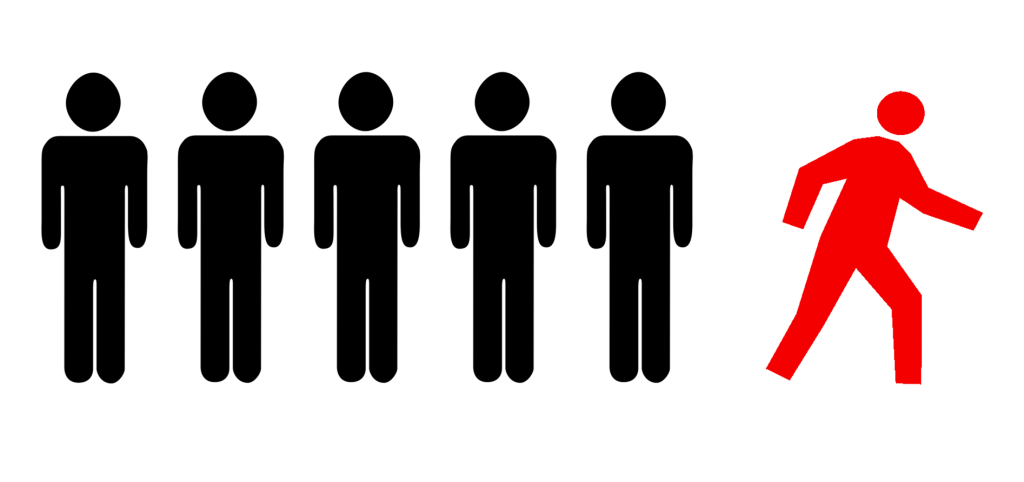

### Objectives

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.


- Recommendation of strategies to manage customer churn based on your observations.

### Evaluation Metrices to be used:


- Accuracy
- Sensitivity
- Specificity
- True Positives
- True Negatives
- False Positives
- False Negatives
- ROC

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc
from sklearn.ensemble import RandomForestClassifier
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
import xgboost as xgb  # Load this xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')#to ignore warnings

## <font color="Green"> Data Dictionary

-	**CIRCLE_ID**	:	Telecom circle area to which the customer belongs to
-	**LOC**	:	Local calls  within same telecom circle
-	**STD**	:	STD calls  outside the calling circle
-	**IC**	:	Incoming calls
-	**OG**	:	Outgoing calls
-	**T2T**	:	Operator T to T ie within same operator mobile to mobile
-	**T2M**	:	Operator T to other operator mobile
-	**T2O**	:	Operator T to other operator fixed line
-	**T2F**	:	Operator T to fixed lines of T
-	**T2C**	:	Operator T to its own call center
-	**ARPU**	:	Average revenue per user
-	**MOU**	:	Minutes of usage  voice calls
-	**AON**	:	Age on network  number of days the customer is using the operator T network
-	**ONNET**	:	All kind of calls within the same operator network
-	**OFFNET**	:	All kind of calls outside the operator T network
-	**ROAM**	:	Indicates that customer is in roaming zone during the call
-	**SPL**	:	Special calls
-	**ISD**	:	ISD calls
-	**RECH**	:	Recharge
-	**NUM**	:	Number
-	**AMT**	:	Amount in local currency
-	**MAX**	:	Maximum
-	**DATA**	:	Mobile internet
-	**3G**	:	G network
-	**AV**	:	Average
-	**VOL**	:	Mobile internet usage volume in MB
-	**2G**	:	G network
-	**PCK**	:	Prepaid service schemes called  PACKS
-	**NIGHT**	:	Scheme to use during specific night hours only
-	**MONTHLY**	:	Service schemes with validity equivalent to a month
-	**SACHET**	:	Service schemes with validity smaller than a month
-	***.6**	:	KPI for the month of June
-	***.7**	:	KPI for the month of July
-	***.8**	:	KPI for the month of August
-	**FB_USER**	:	Service scheme to avail services of Facebook and similar social networking sites
-	**VBC**	:	Volume based cost  when no specific scheme is not purchased and paid as per usage



## <font color="Green"> Loading Datasets

In [2]:
#loading train data
df_train = pd.read_csv("train.csv")
#loading test dataset
df_test_submit = pd.read_csv("test.csv")
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

We will be using:
- solution.csv for checking accuracy and
- submission.csv for kaggle submission.

In [3]:
df_solution_test = pd.read_csv("solution.csv")
df_solution_test.drop('id',inplace=True,axis=1)
y_solution_test = df_solution_test.to_numpy()#y_solution_test for accuracy checking 
df_final_test_submit_kaggle = pd.read_csv("solution.csv")
submission_filename = "Submission.csv"
df_final_test_submit_kaggle['churn_probability'].values[:] = 0 # make all initial predictions to zeros 

## <font color="Green"> Data Understanding

In [4]:
df_train.head()#display train data head

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,31.28,87.01,7.53,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.09,204.99,1.01,0.00,0.00,0.00,8.20,0.63,0.00,0.38,0.00,0.00,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.00,0.00,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.00,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,122.79,42.95,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.73,31.66,0.00,0.00,0.00,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,

In [5]:
df_test_submit.head()#display test data head

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,91.88,65.33,64.44,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.00,0.00,0.00,0.00,0.00,0.00,48.93,7.68,28.48,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.00,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,414.17,515.57,360.87,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.76,17.68,0.00,0.00,0.80,0.00,0.00,0.00,0.00,0.00,0.00,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,6/

In [6]:
print("= = = = = = Data Shape = = = = = = ")
print(f"The train dataset shape is {df_train.shape}")
print(f"The test dataset shape is {df_test_submit.shape}")

= = = = = = Data Shape = = = = = = 
The train dataset shape is (69999, 172)
The test dataset shape is (30000, 171)


In [7]:
print("= = = = = = Data Description = = = = = = ")
df_train.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

= = = = = = Data Description = = = = = = 


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.00,69999.00,69297.00,69297.00,69297.00,69999.00,69999.00,69999.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,69999.00,69999.00,69999.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,69999.00,69999.00,69999.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,67231.00,67312.00,66296.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,17568.00,17865.00,18417.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,69999.00,17568.00,17865.00,18417.00,69999.00,69999.00,69999.00,69999.00,69999.00
mean,34999.00,109.00,0.00,0.00,0.00,283.13,278.19,278.86,133.15,133.89,132.98,198.87,197.15,196.54,9.77,7.01,7.00,14.19,9.84,9.77,46.90,46.17,45.69,93.24,90.80,91.12,3.74,3

In [8]:
print("= = = = = = Data Types = = = = = = ")
df_train.dtypes#display data types

= = = = = = Data Types = = = = = = 


id                            int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            

### Deleting columns that do not contribute to the analysis

In [9]:
delete_cols= ['id','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
df_train.drop(delete_cols,axis=1,inplace = True)
df_test_submit.drop(delete_cols,axis=1,inplace = True)

## <font color="Green"> Data Cleaning

### Checking the Missing Value in Percentage terms in the columns.

In [10]:
null_values = (round(((df_train.isnull().sum()/len(df_train.index))*100),2).to_frame('null')).sort_values('null', 
                                                                                                       ascending=False)

In [11]:
null_values

,null
night_pck_user_6,74.90
max_rech_data_6,74.90
arpu_2g_6,74.90
fb_user_6,74.90
total_rech_data_6,74.90
arpu_3g_6,74.90
count_rech_2g_6,74.90
av_rech_amt_data_6,74.90
count_rech_3g_6,74.90
arpu_2g_7,74.48


#### Checking the "fb_user_6" data

In [12]:
df_train['fb_user_6'].value_counts()

1.00    16098
0.00     1470
Name: fb_user_6, dtype: int64

#### Let us impute the missing values in some categorical columns with -1.

In [13]:
fill_with_new_category = ['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']
df_train.update(df_train[fill_with_new_category].fillna(-1))
df_test_submit.update(df_train[fill_with_new_category].fillna(-1))

#### Checking the "night_pck_user_8" data

In [14]:
df_train['night_pck_user_8'].value_counts()

-1.00    51582
0.00     18030
1.00       387
Name: night_pck_user_8, dtype: int64

In [15]:
fill_with_zeros = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
                   'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
                   'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

#### Let us impute the missing values in above columns with 0.

In [16]:
df_train.update(df_train[fill_with_zeros].fillna(0))
df_test_submit.update(df_train[fill_with_zeros].fillna(0))
df_train.fillna(0,inplace=True)
df_test_submit.fillna(0,inplace=True)

### Outlier Treatment 

Here we will remove the values which are less than **[q1-(1.5 x inter_quartile_range)]** and greater than **[q3+(1.5 x inter_quartile_range)]**

In [17]:
for col in df_train.columns: 
    q1 = df_train[col].quantile(0.10)
    q3 = df_train[col].quantile(0.90)
    inter_quartile_range = q3-q1
    range_low  = q1-1.5*inter_quartile_range
    range_high = q3+1.5*inter_quartile_range
    train = df_train.loc[(df_train[col] > range_low) & (df_train[col] < range_high)]
df_train=train
df_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.00,0.00,0.00,31.28,87.01,7.53,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.09,204.99,1.01,0.00,0.00,0.00,8.20,0.63,0.00,0.38,0.00,0.00,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.00,0.00,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.00,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,0,0,0,0,0,0,0,0,0,0,0,0,-1.00,-1.00,-1.00,1958,0.00,0.00,0.00,0
1,0.00,0.00,0.00,0.00,122.79,42.95,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.73,31.66,0.00,0.00,0.00,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.00,1.00,0.00,0.00,145.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,145.00,0.00,0.00,352.91,0.00,0.00,3.96,0.00,0.00,122.07,0.00,0.00,122.08,0.00,-1.00,0.00,-1.00,0,0,0,0,0,0,0,1,0,0,0,0,-1.00,1.00,-1.00,710,0.00,0.00,0.00,0
2,0.00,0.00,0.00,60.81,103.18,0.00,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.53,12.98,0.

#### Let us calculate null value percentages after imputation

In [18]:
null_values = (round(((df_train.isnull().sum()/len(df_train.index))*100),2).to_frame('null')).sort_values('null', 
                                                                                                       ascending=False)

In [19]:
null_values

,null
loc_og_t2o_mou,0.00
std_ic_t2o_mou_6,0.00
total_rech_amt_7,0.00
total_rech_amt_8,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
last_day_rch_amt_6,0.00
last_day_rch_amt_7,0.00
last_day_rch_amt_8,0.00


#### Thus our data has no missing values

### Deriving new Business Metrices

#### Here we devise new metrics based on recharge amount of calls and data

In [20]:
df_train['total_avg_call_rech_amt_6_7'] = (df_train['total_rech_amt_6'] + df_train['total_rech_amt_7'])/2
df_train['total_data_rech_amt_6'] = df_train['av_rech_amt_data_6'] * df_train['total_rech_data_6']
df_train['total_data_rech_amt_7'] = df_train['av_rech_amt_data_7'] * df_train['total_rech_data_7']
df_train['total_avg_data_rech_amt_6_7'] = (df_train['total_data_rech_amt_6'] * df_train['total_data_rech_amt_7'])/2
df_train['total_avg_rech_amt_6_7'] = df_train['total_avg_call_rech_amt_6_7'] + df_train['total_avg_data_rech_amt_6_7']

In [21]:
df_test_submit['total_avg_call_rech_amt_6_7'] = (df_test_submit['total_rech_amt_6'] + df_test_submit['total_rech_amt_7'])/2
df_test_submit['total_data_rech_amt_6'] = df_test_submit['av_rech_amt_data_6'] * df_test_submit['total_rech_data_6']
df_test_submit['total_data_rech_amt_7'] = df_test_submit['av_rech_amt_data_7'] * df_test_submit['total_rech_data_7']
df_test_submit['total_avg_data_rech_amt_6_7'] = (df_test_submit['total_data_rech_amt_6'] * df_test_submit['total_data_rech_amt_7'])/2
df_test_submit['total_avg_rech_amt_6_7'] = df_test_submit['total_avg_call_rech_amt_6_7'] + df_test_submit['total_avg_data_rech_amt_6_7']

#### Here we define new metrices to find difference in recharge amount in months 6 & 7 and month 8.

In [22]:
df_train['total_data_rech_amt_8'] = df_train['av_rech_amt_data_8'] * df_train['total_rech_data_8']
df_train['total_avg_rech_amt_8'] = df_train['total_rech_amt_8'] + df_train['total_data_rech_amt_8']
df_train['difference_recharge_amt'] = df_train['total_avg_rech_amt_6_7'] - df_train['total_avg_rech_amt_8']

In [23]:
df_test_submit['total_data_rech_amt_8'] = df_test_submit['av_rech_amt_data_8'] * df_test_submit['total_rech_data_8']
df_test_submit['total_avg_rech_amt_8'] = df_test_submit['total_rech_amt_8'] + df_test_submit['total_data_rech_amt_8']
df_test_submit['difference_recharge_amt'] = df_test_submit['total_avg_rech_amt_6_7'] - df_test_submit['total_avg_rech_amt_8']

#### Defining new metrices to find the difference in in months 6 & 7 and month 8 with respect to "Average Revenue per User", "Minutes of Usage over voice calls", and "Volume of data usage".

In [24]:
df_train['arpu_diff'] = ((df_train['arpu_6'] + df_train['arpu_7'])/2)- df_train['arpu_8']
df_train['total_ic_mou_diff'] = ((df_train['total_ic_mou_6'] + df_train['total_ic_mou_7'])/2)- df_train['total_ic_mou_8']
df_train['total_og_mou_diff'] = ((df_train['total_og_mou_6'] + df_train['total_og_mou_6'])/2)- df_train['total_og_mou_8']
df_train['vol_2g_mb_diff'] = ((df_train['vol_2g_mb_6'] + df_train['vol_2g_mb_7'])/2)- df_train['vol_2g_mb_8']
df_train['vol_3g_mb_diff'] = ((df_train['vol_3g_mb_6'] + df_train['vol_3g_mb_7'])/2)- df_train['vol_3g_mb_8']

In [25]:
df_test_submit['arpu_diff'] = ((df_test_submit['arpu_6'] + df_test_submit['arpu_7'])/2)- df_test_submit['arpu_8']
df_test_submit['total_ic_mou_diff'] = ((df_test_submit['total_ic_mou_6'] + df_test_submit['total_ic_mou_7'])/2)- df_test_submit['total_ic_mou_8']
df_test_submit['total_og_mou_diff'] = ((df_test_submit['total_og_mou_6'] + df_test_submit['total_og_mou_6'])/2)- df_test_submit['total_og_mou_8']
df_test_submit['vol_2g_mb_diff'] = ((df_test_submit['vol_2g_mb_6'] + df_test_submit['vol_2g_mb_7'])/2)- df_test_submit['vol_2g_mb_8']
df_test_submit['vol_3g_mb_diff'] = ((df_test_submit['vol_3g_mb_6'] + df_test_submit['vol_3g_mb_7'])/2)- df_test_submit['vol_3g_mb_8']

### Let us Segregate the high valued customers

In [26]:
avg_value = df_train['total_avg_rech_amt_6_7'].quantile(0.70)
avg_value

522.5

In [27]:
df_train_dummy = df_train[df_train['total_avg_rech_amt_6_7'] >= avg_value]
print(f" The actual Train Data shape is {df_train.shape}") 
print(f" Train Data shape after considering only high valued customers is {df_train_dummy.shape}") 


 The actual Train Data shape is (69999, 174)
 Train Data shape after considering only high valued customers is (21008, 174)


In [28]:
df_test_dummy = df_test_submit[df_test_submit['total_avg_rech_amt_6_7'] >= avg_value]
print(f" The actual Test Data shape is {df_test_submit.shape}")
print(f" Train Data shape after considering only high valued customers is {df_test_dummy.shape}") 

 The actual Test Data shape is (30000, 173)
 Train Data shape after considering only high valued customers is (9723, 173)


#### From above it can be seen that only 32.41% of the customers in test data are high valued customers.
#### Thus, if the model is built considering only high valued customer than the model will be exposed to a large number of new customers which it has never seen before. Hence we will consider all the rows for training the model.

## <font color="Green"> Data Visualization

#### Let us grab the columns required for visualization

In [29]:
visu_cols=['churn_probability','difference_recharge_amt','arpu_6','arpu_7','arpu_8','arpu_diff','total_ic_mou_diff','total_og_mou_diff',
           'vol_2g_mb_diff','vol_3g_mb_diff','total_avg_rech_amt_6_7','total_avg_rech_amt_8']

In [30]:
df_visu_numeric = df_train[visu_cols]

#### Displaying difference_recharge_amt_visu with respect to churn probability. If difference is more then churn probability is more.

#### Displaing arpu_diff with respect to churn probability, if difference is more then churn probability is more.

In [31]:
df_visu_numeric['difference_recharge_amt_visu'] = np.where((df_visu_numeric['difference_recharge_amt'] > 100), 1, 0)
df_visu_numeric['arpu_diff_visu'] = np.where(df_visu_numeric['arpu_diff'] > 50, 1, 0)

### Bar plot for Churn Probability with Difference in Recharge Amount

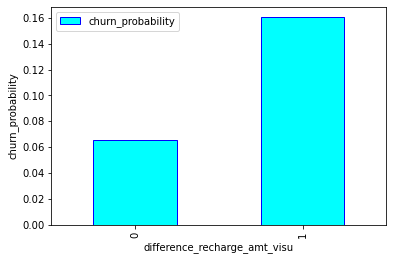

In [32]:
df_visu_numeric.pivot_table(values='churn_probability', index='difference_recharge_amt_visu', 
                            aggfunc='mean').plot.bar(color=['cyan'], edgecolor='blue')
plt.ylabel('churn_probability')
plt.show()

### Bar plot for Churn Probability with Difference in Average Revenue Per User

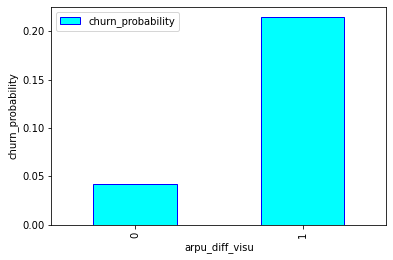

In [33]:
df_visu_numeric.pivot_table(values='churn_probability', 
                            index='arpu_diff_visu', aggfunc='mean').plot.bar(color=['cyan'], edgecolor='blue')
plt.ylabel('churn_probability')
plt.show()

### Box Plot for Important Numerical Features

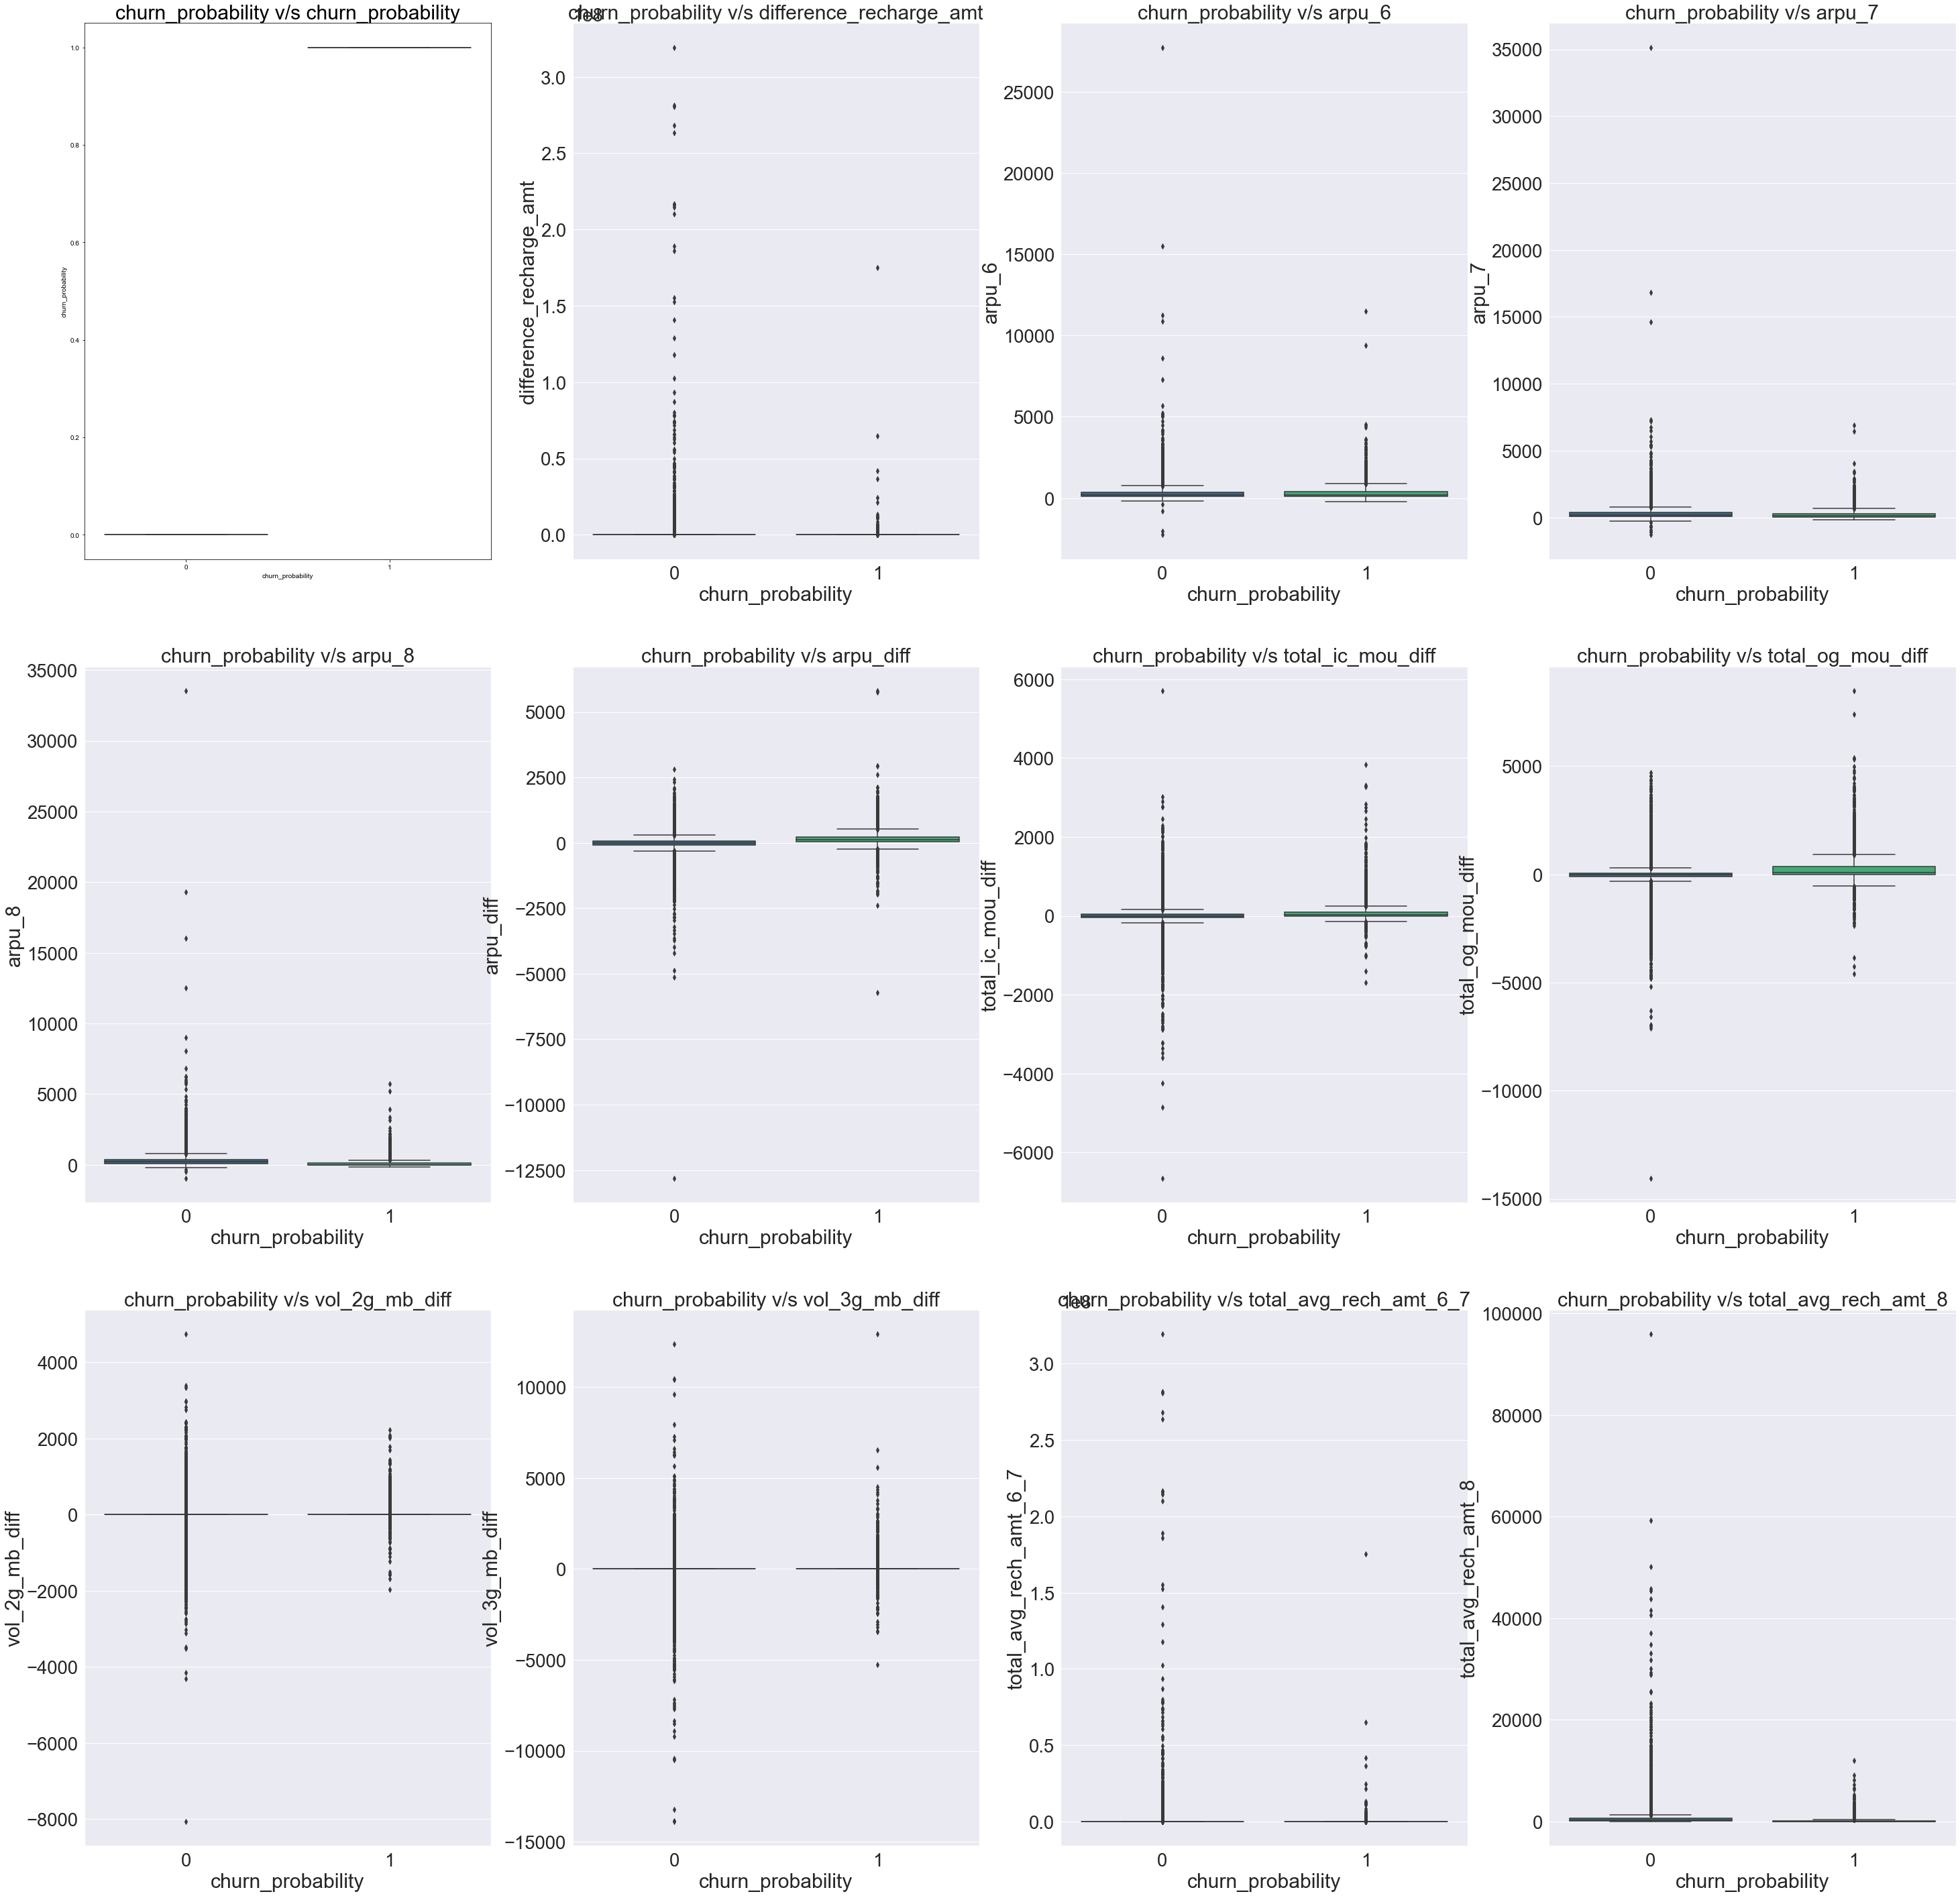

In [34]:
plt.figure(figsize=(50,50))
for i in range(min(49,len(visu_cols))):
    plt.subplot(3,4, i + 1)
    sns.set(font_scale=2.5)
    ax=sns.boxplot(y=df_visu_numeric.columns[i], x='churn_probability', data=df_visu_numeric,palette = 'viridis')
    ax.set_title('churn_probability v/s '+str(df_visu_numeric.columns[i]), fontsize=30)
plt.show()

#### Let us visualise the box plot in logarithmic scale

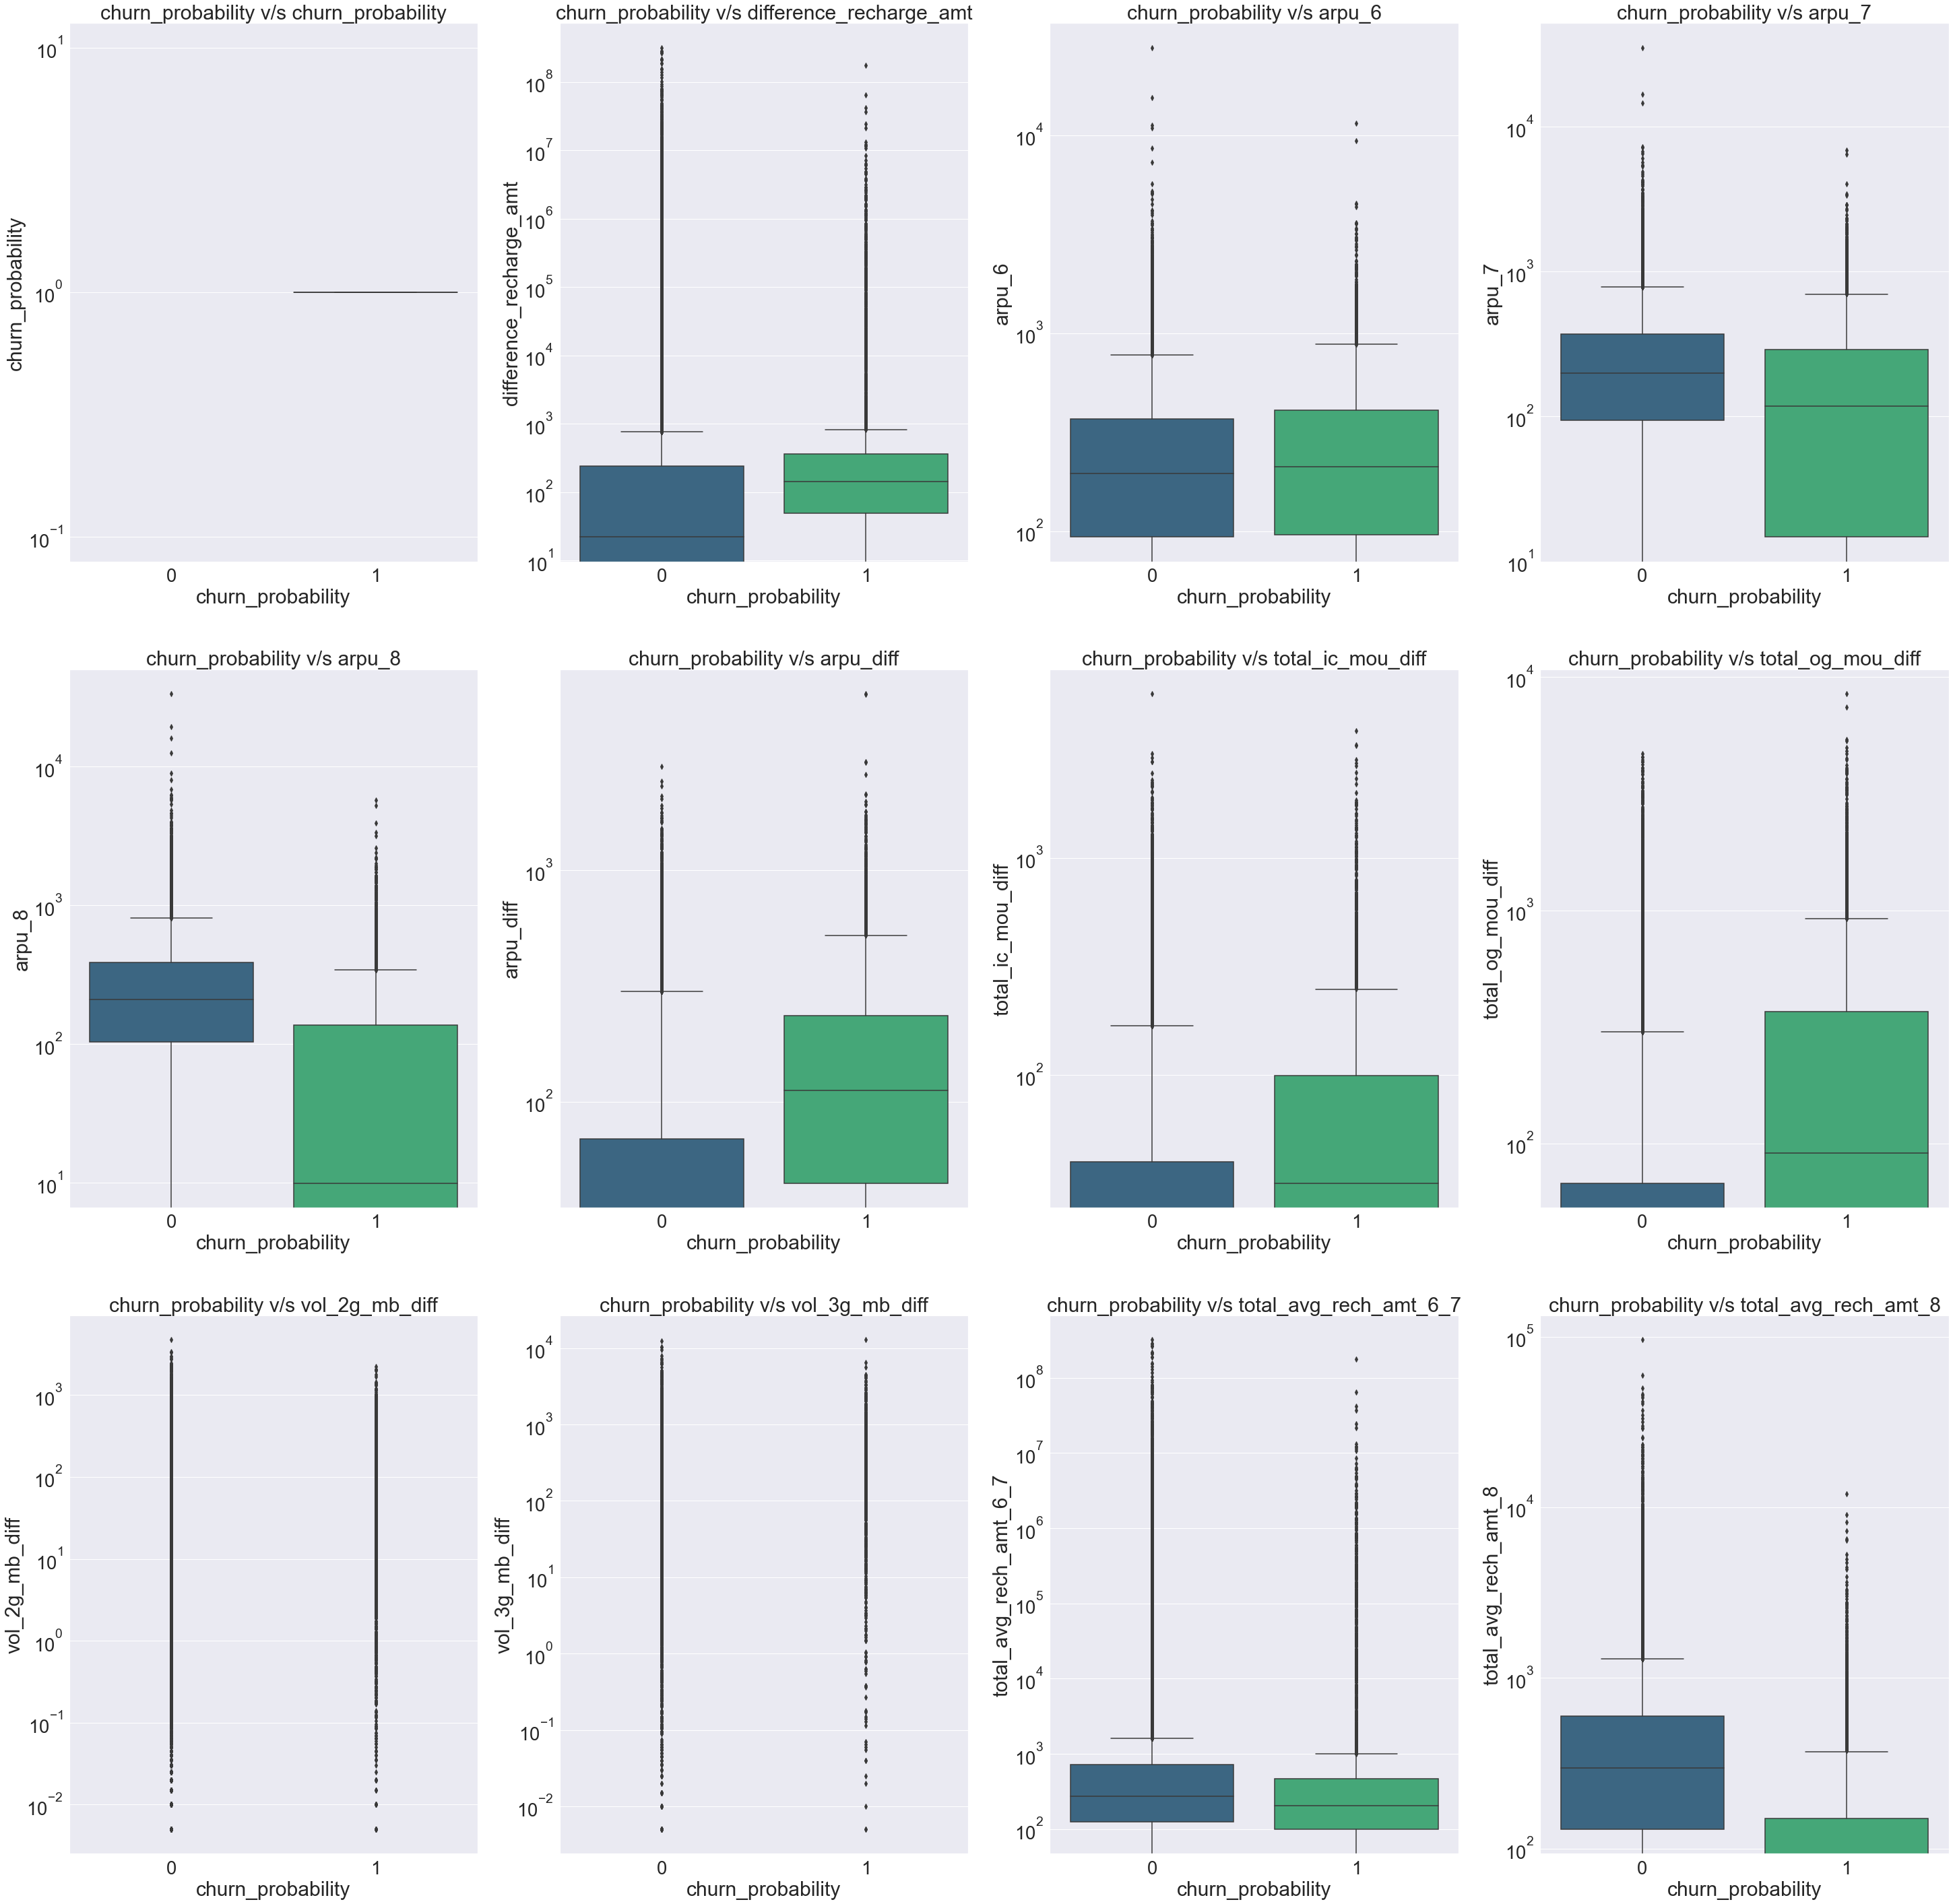

In [35]:
plt.figure(figsize=(50,50))
for i in range(min(49,len(visu_cols))):
    plt.subplot(3,4, i + 1)
    sns.set(font_scale=2.5)
    ax=sns.boxplot(y=df_visu_numeric.columns[i], x='churn_probability', data=df_visu_numeric,palette = 'viridis')
    ax.set_yscale("log")
    ax.set_title('churn_probability v/s '+str(df_visu_numeric.columns[i]), fontsize=30)
plt.show()

### Creating Distribution plot for important Numerical Features

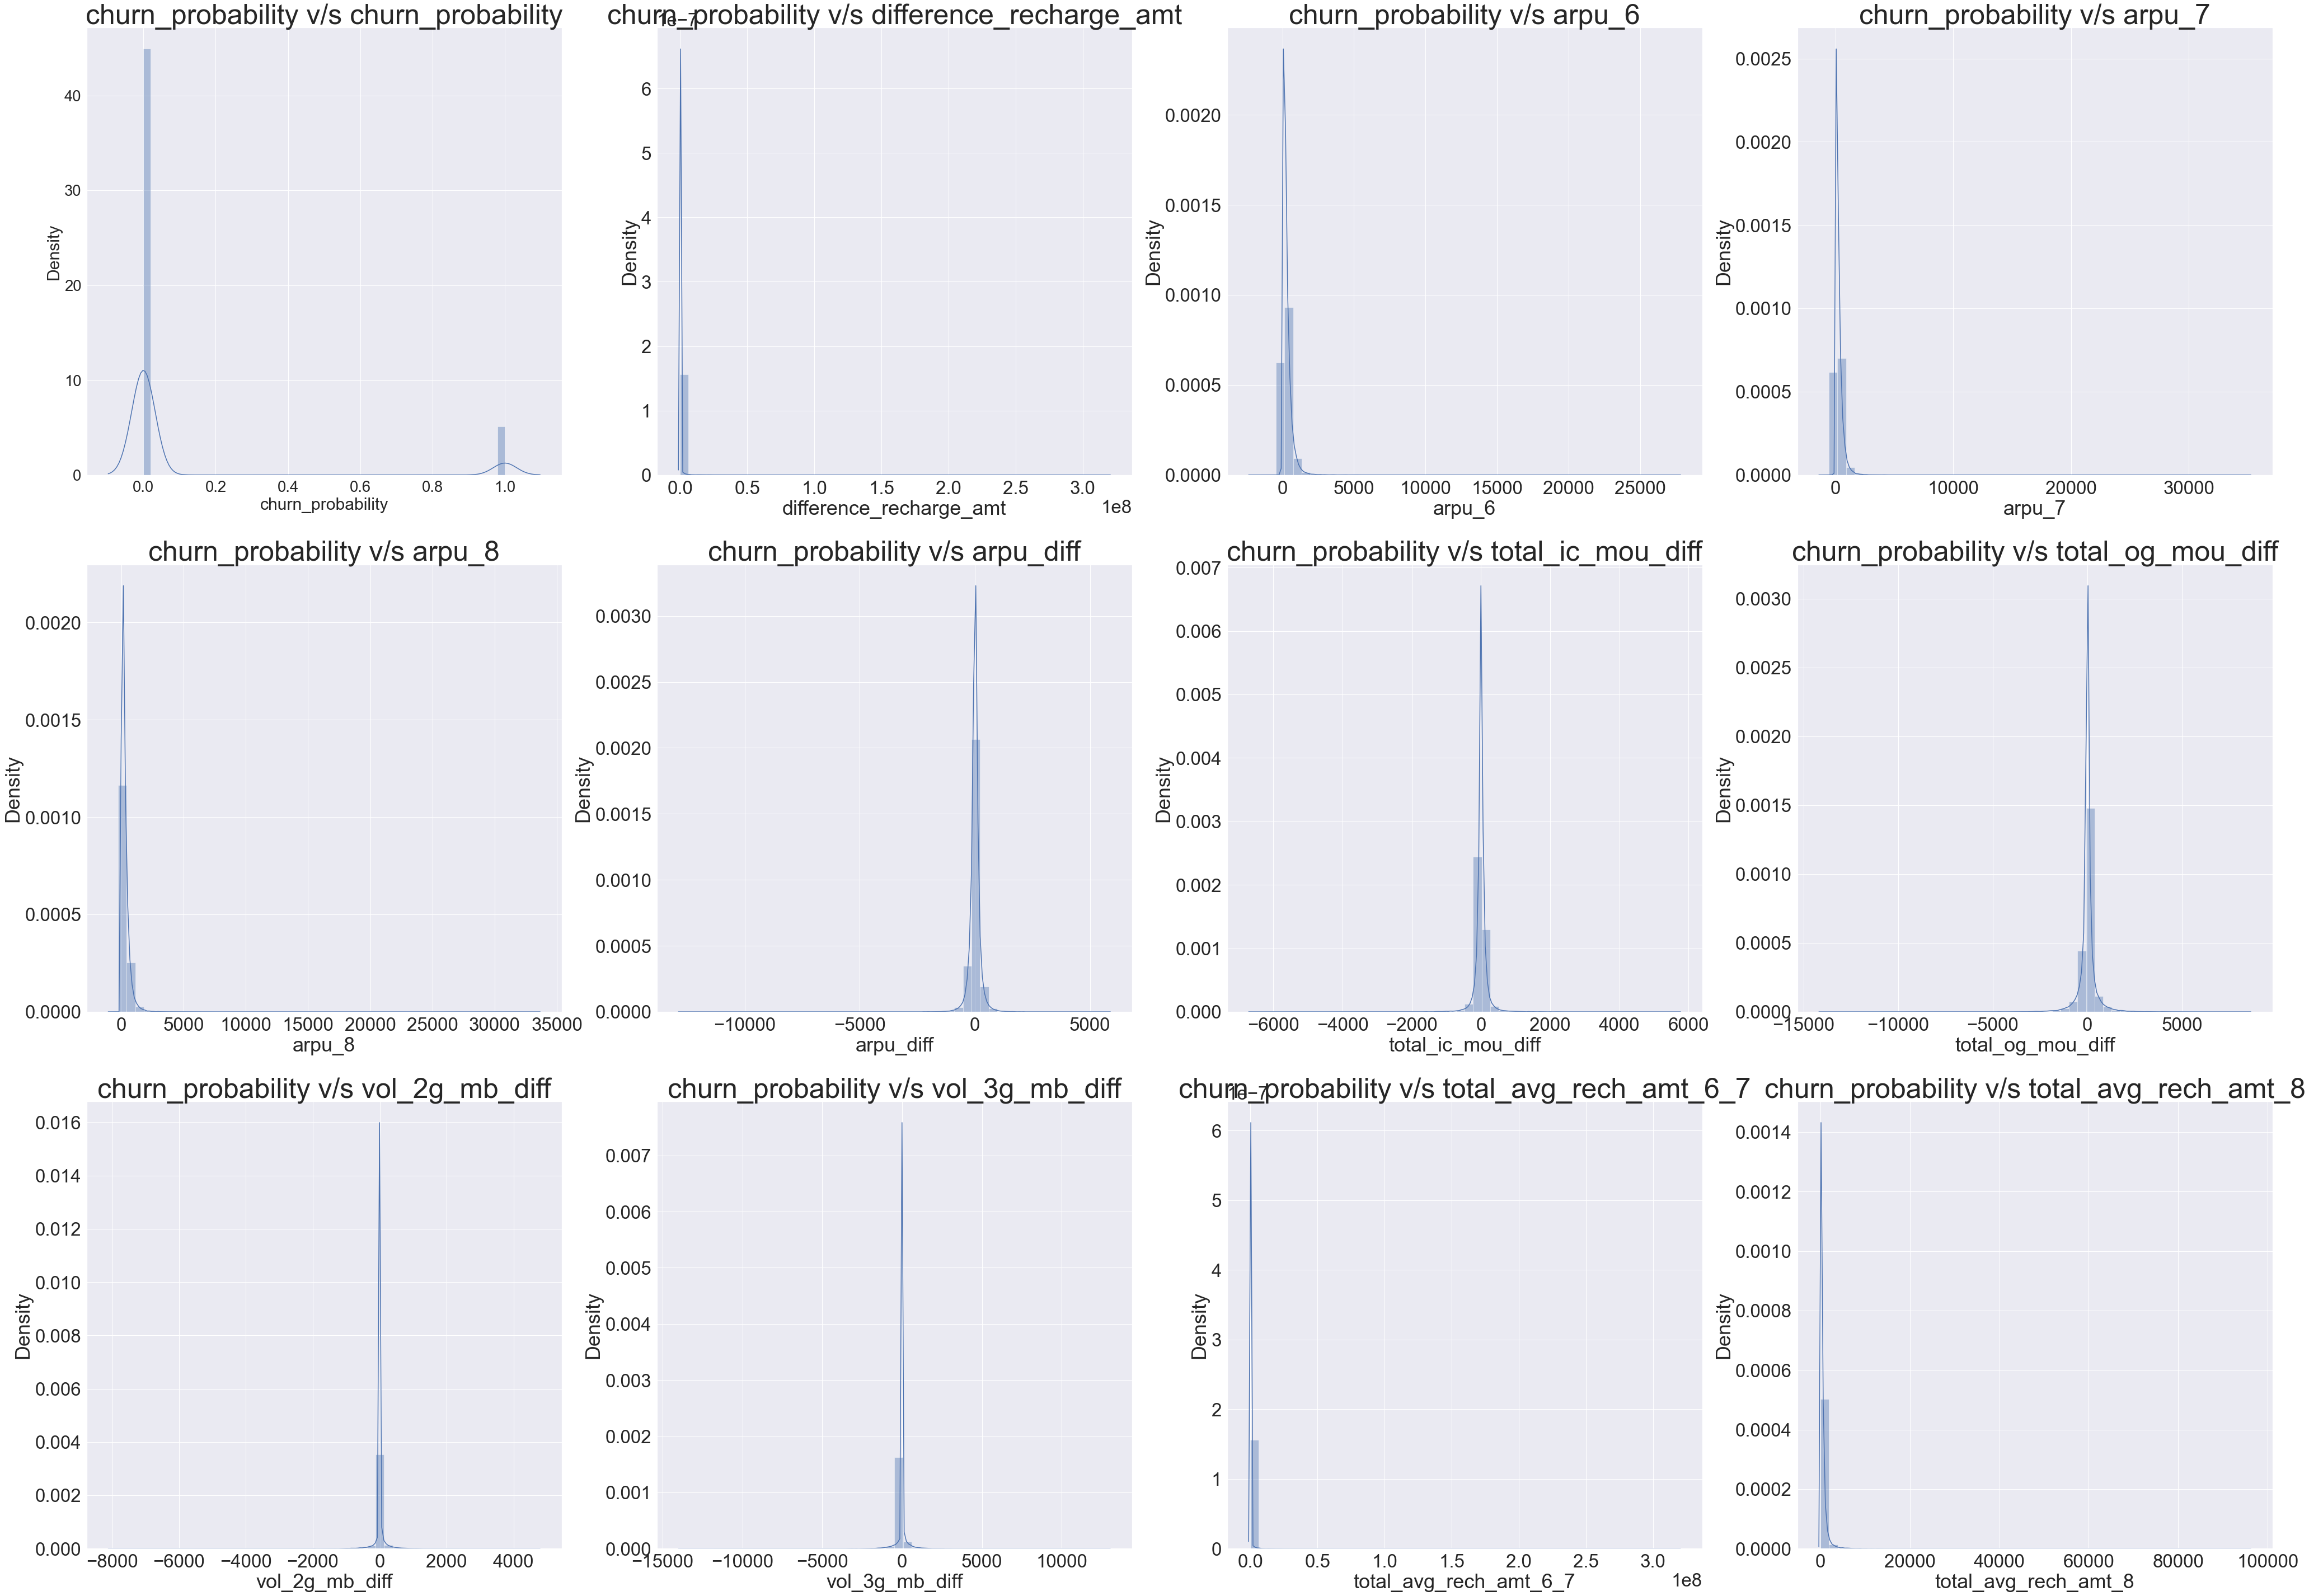

In [36]:
plt.figure(figsize=(70,50))
for i in range(min(49,len(df_visu_numeric.columns)-2)):
    plt.subplot(3,4, i + 1)
    sns.set(font_scale=3)
    ax=sns.distplot(df_visu_numeric[df_visu_numeric.columns[i]])
    ax.set_title('churn_probability v/s '+str(df_visu_numeric.columns[i]), fontsize=50)
plt.show()

### Creating Correlation Heatmap for important Numerical Features

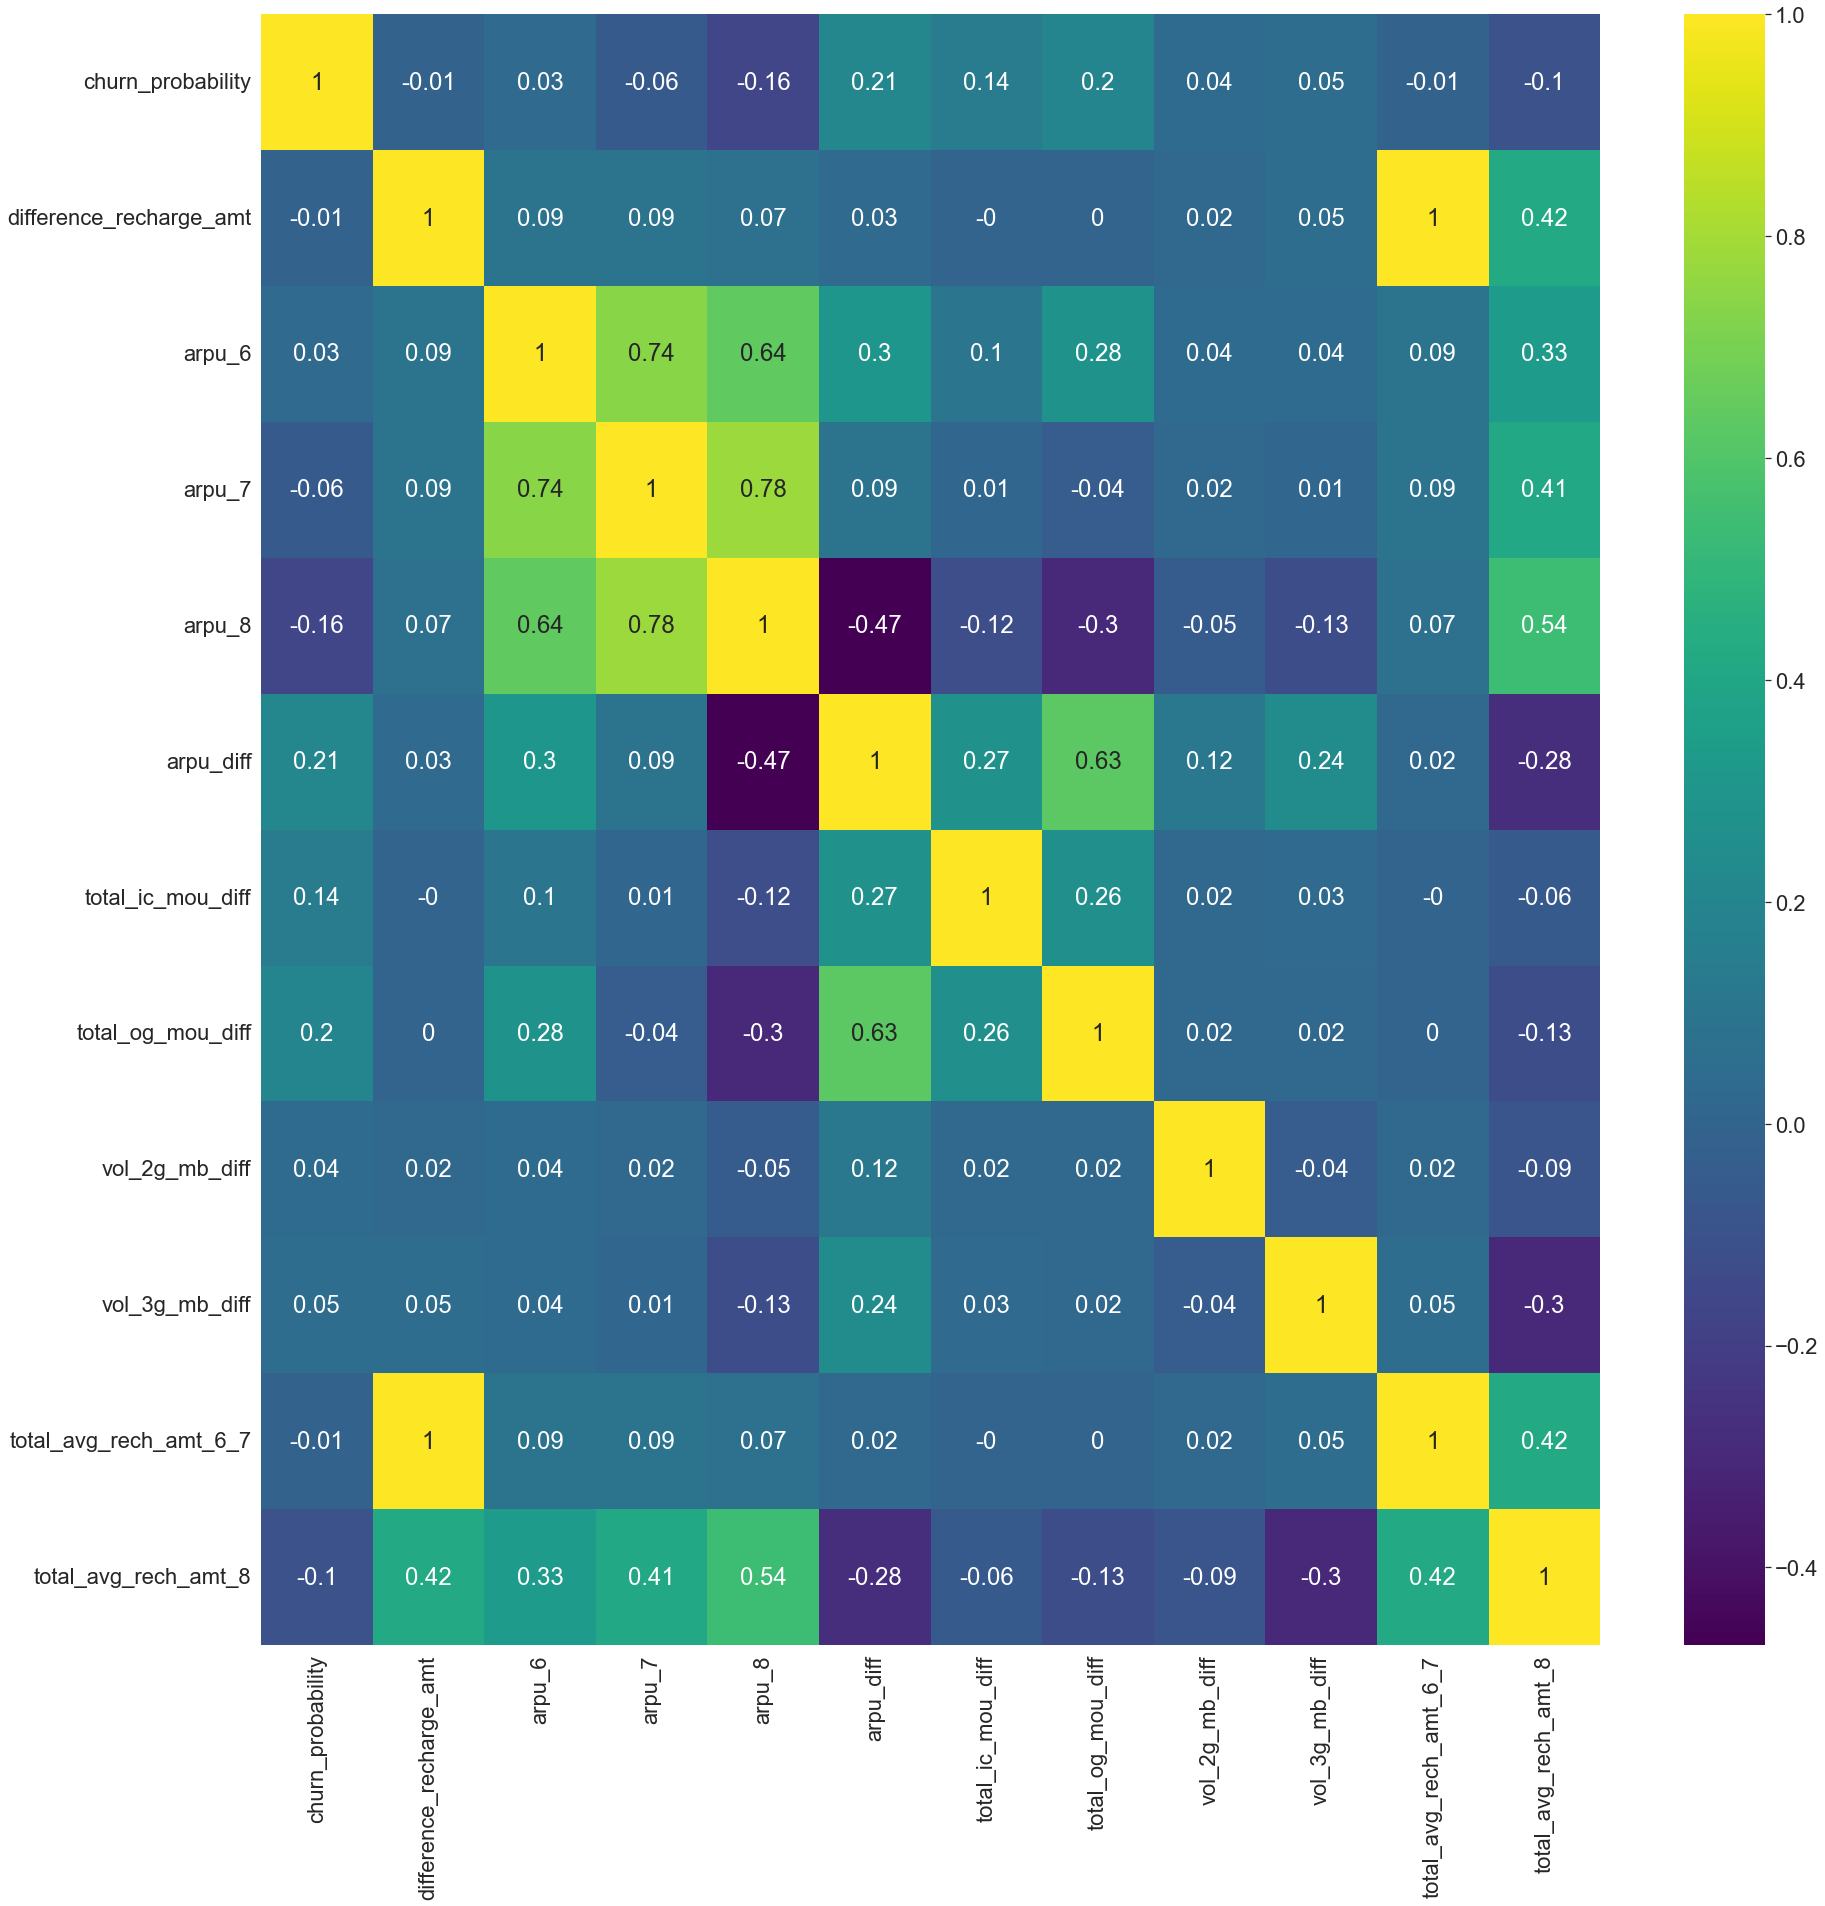

In [37]:
df_numeric_corr = df_train[visu_cols]
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.heatmap(round(df_numeric_corr.corr(),2),cmap="viridis",annot=True)
plt.show()

### Inference from EDA:

- If the **average revenue difference** for June-July combined is significantly more than that of August, the customer under the scanner is more prone to churn.

- The customer is also likely to churn if the **difference in Recharge amount**  is remarkably more in June-July combined  than that of August.

- The **Average revenue per customer difference** shows appreciable correlation with the **total outgoing minutes of usage difference**.

- The customers with **lesser recharge amount** in month of august are more likely to churn.

- The total **incoming and outgoing minutes of usage** are significantly less in August then in June-July combined for customers who are more likely to churn.

- Customers who are more likely to churn have shown notably lesser **data MB usage**  in August then in June-July combined

## <font color="Green"> Model Building

#### Creating a function to get the evaluation metrices.

In [38]:
def get_error_stats(y,y_pred,name="test",DoPrint=True):
    
    print(f"====== {name.upper()} ======")
    print(f"====== Confusion Metrics ======")
    confusion  = metrics.confusion_matrix(y, y_pred)
    print(confusion)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("True Positives: ",TP)
    print("True Negatives: ",TN)
    print("False Positives: ",FP)
    print("False Negatives: ",FN)
    print("Accuracy:",metrics.accuracy_score(y, y_pred))
    print("Sensitivity:",TP / float(TP+FN))
    print("Specificity:", TN / float(TN+FP))
    print("ROC",metrics.roc_auc_score(y, y_pred))

#### Let's check the churn probability

In [39]:
y_churn_prob = df_train.pop('churn_probability')
y_churn_prob.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

#### We are going to split the train data into train and test data sets. This test data will be used for validation and is different from the test_submission dataset.

In [40]:
X_train, X_test,y_train, y_test = train_test_split(df_train, y_churn_prob, stratify=y_churn_prob, train_size = 0.9, test_size = 0.1, random_state = 21)

#### Using SMOTE function for oversampling of the data, since we have class imbalanced data.

In [41]:
random_over_sampler = SMOTE(random_state=44)
X_train_resample,y_train_resample = random_over_sampler.fit_resample(X_train,y_train)

In [42]:
 X_train_resample.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'total_avg_data_rech_amt_6_7', 'total_avg_rech_amt_6_7',
       'total_data_rech_amt_8', 'total_avg_rech_amt_8',
       'difference_recharge_amt', 'arpu_diff', 'total_ic_mou_diff',
       'total_og_mou_diff', 'vol_2g_mb_diff', 'vol_3g_mb_diff'],
      dtype='object', length=173)

### Scaling of Data

In [43]:
#scaler = StandardScaler()
#scaler = MinMaxScaler()
#cols = X_train_resample.columns
#X_train_resample[cols] = scaler.fit_transform(X_train_resample)
#X_test[cols] = scaler.transform(X_test)

## <font color="Blue"> Logistic Regression Model without PCA

In [44]:
log = LogisticRegression()

### Recursive Feature Elimination for the Model

In [45]:
rfe = RFE(log,n_features_to_select=15)
rfe = rfe.fit(X_train_resample,y_train_resample)
#List of top 15 features selected by RFE.
list(zip(X_train_resample.columns, rfe.support_, rfe.ranking_))
col = X_train_resample.columns[rfe.support_]
X_train_resample_rfe = X_train_resample[col]
cols = X_train_resample_rfe.columns
X_train_resample.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_avg_data_rech_amt_6_7', 'total_avg_rech_amt_6_7',
       'total_data_rech_amt_8', 'total_avg_rech_amt_8',
       'difference_recharge_amt', 'total_og_mou_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=158)

### Building some functions for Model Building

In [46]:
#Defining function to build  logistic model
def sm_model(X,y):
    X_train_sm = sm.add_constant(X)
    logm = sm.GLM(y, X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    
    return res.summary()

In [47]:
#defining model to perform VIF
def vif_check(X,y):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### Trial No. 1:

In [48]:
sm_model(X_train_resample[cols],y_train_resample)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               113160
Model:                            GLM   Df Residuals:                   113144
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51536.
Date:                Wed, 14 Dec 2022   Deviance:                   1.0307e+05
Time:                        22:10:15   Pearson chi2:                 5.81e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3784
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9008      0.012     74.047      0.000       0.877       0.925
arpu_6                 0.0008      0.000      6.767      0.000       0.001       0.001
roam_og_mou_8          0.0052      0.000     28.448      0.000       0.005       0.006
loc_og_t2t_mou_8      -0.0038      0.002     -2.346      0.019      -0.007      -0.001
loc_og_t2m_mou_8      -0.0063      0.002     -3.803      0.000      -0.010      -0.003
loc_og_mou_8           0.0015      0.002      0.908      0.364      -0.002       0.005
loc_ic_t2t_mou_8       0.0167      0.001     15.080      0.000       0.015       0.019
loc_ic_t2m_mou_8       0.0094      0.001      8.333      0.000       0.007       0.012
loc_ic_mou_8          -0.0197      0.001    -18.313      0.000      -0.022      -0.018
total_ic_mou_8        -0.0023      0.000    -14.086      0.000      -0.003      -0.002
total_rech_amt_6      -0.0007   9.33e-05     -7.185      0.000      -0.001      -0.000
last_day_rch_amt_8    -0.0050      0.000    -33.229      0.000      -0.005      -0.005
vol_2g_mb_8           -0.0024    8.9e-05    -26.789      0.000      -0.003      -0.002
aug_vbc_3g            -0.0008   5.97e-05    -12.924      0.000      -0.001      -0.001
arpu_diff              0.0022   6.22e-05     34.836      0.000       0.002       0.002
total_ic_mou_diff      0.0021   7.94e-05     25.971      0.000       0.002       0.002
======================================================================================
"""

In [49]:
vif_check(X_train_resample[cols],y_train_resample)

,Features,VIF
4,loc_og_mou_8,541.60
3,loc_og_t2m_mou_8,223.14
2,loc_og_t2t_mou_8,174.49
7,loc_ic_mou_8,73.58
6,loc_ic_t2m_mou_8,33.87
0,arpu_6,23.15
9,total_rech_amt_6,22.29
5,loc_ic_t2t_mou_8,18.77
8,total_ic_mou_8,7.58
13,arpu_diff,2.04


**The p value for 'loc_og_mou_8'  is more than acceptable and hence we drop it.**


#### Trial 2:


In [51]:
cols = cols.drop('loc_og_mou_8',1)

In [52]:
sm_model(X_train_resample[cols],y_train_resample)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               113160
Model:                            GLM   Df Residuals:                   113145
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51536.
Date:                Wed, 14 Dec 2022   Deviance:                   1.0307e+05
Time:                        22:14:00   Pearson chi2:                 5.56e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3784
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9008      0.012     74.047      0.000       0.877       0.925
arpu_6                 0.0008      0.000      6.771      0.000       0.001       0.001
roam_og_mou_8          0.0052      0.000     28.429      0.000       0.005       0.006
loc_og_t2t_mou_8      -0.0024      0.000     -9.944      0.000      -0.003      -0.002
loc_og_t2m_mou_8      -0.0048      0.000    -20.665      0.000      -0.005      -0.004
loc_ic_t2t_mou_8       0.0165      0.001     15.217      0.000       0.014       0.019
loc_ic_t2m_mou_8       0.0092      0.001      8.329      0.000       0.007       0.011
loc_ic_mou_8          -0.0195      0.001    -18.521      0.000      -0.022      -0.017
total_ic_mou_8        -0.0023      0.000    -14.068      0.000      -0.003      -0.002
total_rech_amt_6      -0.0007   9.34e-05     -7.187      0.000      -0.001      -0.000
last_day_rch_amt_8    -0.0050      0.000    -33.217      0.000      -0.005      -0.005
vol_2g_mb_8           -0.0024    8.9e-05    -26.802      0.000      -0.003      -0.002
aug_vbc_3g            -0.0008   5.96e-05    -12.914      0.000      -0.001      -0.001
arpu_diff              0.0022   6.22e-05     34.829      0.000       0.002       0.002
total_ic_mou_diff      0.0021   7.94e-05     25.967      0.000       0.002       0.002
======================================================================================
"""

In [53]:
vif_check(X_train_resample[cols],y_train_resample)

,Features,VIF
6,loc_ic_mou_8,70.36
5,loc_ic_t2m_mou_8,32.42
0,arpu_6,23.13
8,total_rech_amt_6,22.28
4,loc_ic_t2t_mou_8,17.90
7,total_ic_mou_8,7.58
3,loc_og_t2m_mou_8,2.03
12,arpu_diff,2.03
9,last_day_rch_amt_8,1.50
13,total_ic_mou_diff,1.23


**Now the p-values are acceptable , hence we proceed towards building final model.**

The Grid Search CV model for Logistic regression

In [54]:
params = {'C': [1,5,10,15,20,50,100]}
logistic_regression = LogisticRegression()
# cross validation
folds = 5
logistic_model_cv_without_pca = GridSearchCV(estimator = logistic_regression, 
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)           
logistic_model_cv_without_pca.fit(X_train_resample[cols], y_train_resample)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 15, 20, 50, 100]},
             return_train_score=True, scoring='recall', verbose=1)

In [55]:
logistic_model_cv_without_pca_results = pd.DataFrame(logistic_model_cv_without_pca.cv_results_)
logistic_model_cv_without_pca_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.64,0.02,0.01,0.00,1,{'C': 1},0.87,0.87,0.87,0.88,0.87,0.87,0.00,6,0.87,0.87,0.87,0.87,0.87,0.87,0.00
1,0.60,0.03,0.01,0.00,5,{'C': 5},0.87,0.87,0.87,0.88,0.87,0.87,0.00,3,0.87,0.87,0.87,0.87,0.87,0.87,0.00
2,0.60,0.03,0.01,0.00,10,{'C': 10},0.87,0.87,0.87,0.88,0.87,0.87,0.00,4,0.87,0.87,0.87,0.87,0.87,0.87,0.00
3,0.60,0.03,0.01,0.00,15,{'C': 15},0.87,0.87,0.87,0.88,0.87,0.87,0.00,5,0.87,0.87,0.87,0.87,0.87,0.87,0.00
4,0.61,0.03,0.01,0.00,20,{'C': 20},0.86,0.87,0.87,0.88,0.87,0.87,0.00,7,0.87,0.87,0.87,0.87,0.87,0.87,0.00
5,0.60,0.02,0.01,0.00,50,{'C': 50},0.87,0.87,0.87,0.88,0.87,0.87,0.00,2,0.87,0.87,0.87,0.87,0.87,0.87,0.00
6,0.60,0.02,0.01,0.00,100,{'C': 100},0.87,0.87,0.87,0.88,0.87,0.87,0.00,1,0.87,0.87,0.87,0.87,0.87,0.87,0.00


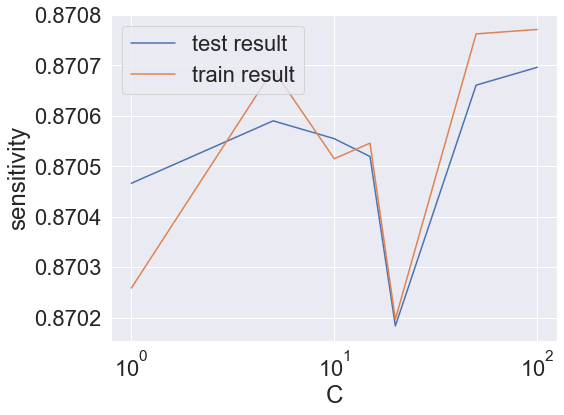

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(logistic_model_cv_without_pca_results['param_C'], logistic_model_cv_without_pca_results['mean_test_score'])
plt.plot(logistic_model_cv_without_pca_results['param_C'], logistic_model_cv_without_pca_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [57]:
best_C = logistic_model_cv_without_pca.best_estimator_.C
logistic_model_cv_without_pca.best_score_

0.8706963591375043

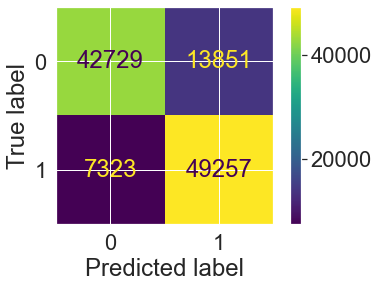

In [58]:
metrics.plot_confusion_matrix(logistic_model_cv_without_pca, X_train_resample[cols], y_train_resample)
plt.show()

#### Checking the metrics for train set

In [59]:
y_train_resample_pred = logistic_model_cv_without_pca.predict(X_train_resample[cols])
get_error_stats(y_train_resample,y_train_resample_pred,"train")

====== TRAIN ======
====== Confusion Metrics ======
[[42729 13851]
 [ 7323 49257]]
True Positives:  49257
True Negatives:  42729
False Positives:  13851
False Negatives:  7323
Accuracy: 0.8128844114528102
Sensitivity: 0.8705726405090138
Specificity: 0.7551961823966066
ROC 0.8128844114528102


#### Checking the metrics for test (validation) set

In [60]:
y_test_without_pca_pred =  logistic_model_cv_without_pca.predict(X_test[cols])
get_error_stats(y_test,y_test_without_pca_pred,"test")

====== TEST ======
====== Confusion Metrics ======
[[4767 1520]
 [ 107  606]]
True Positives:  606
True Negatives:  4767
False Positives:  1520
False Negatives:  107
Accuracy: 0.7675714285714286
Sensitivity: 0.8499298737727911
Specificity: 0.7582312708764116
ROC 0.8040805723246013


#### Checking the metrics for test (submission) set

In [61]:
df_submit_test_without_pca =(df_test_submit[cols])
df_submit_test_without_pca.shape

(30000, 14)

In [62]:
y_submit_test_without_pca_pred = logistic_model_cv_without_pca.predict(df_submit_test_without_pca)
y_submit_test_without_pca_pred.shape

(30000,)

In [63]:
get_error_stats(y_solution_test,y_submit_test_without_pca_pred,"submit")

====== SUBMIT ======
====== Confusion Metrics ======
[[20243  6698]
 [  440  2619]]
True Positives:  2619
True Negatives:  20243
False Positives:  6698
False Negatives:  440
Accuracy: 0.7620666666666667
Sensitivity: 0.856162144491664
Specificity: 0.7513826509780632
ROC 0.8037723977348635


## <font color="Blue"> Random forest Model without PCA

In [64]:
#creating Random Forest instance
rf = RandomForestClassifier(random_state=101, n_jobs=-1)

In [65]:
params = {'max_depth': [2,5,10,20],'min_samples_leaf': [5,10,20,50,100],'n_estimators': [10,50, 100]}

In [66]:
rf_grid_search_without_pca = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 2,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [67]:
rf_grid_search_without_pca.fit(X_train_resample,y_train_resample)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [20], 'min_samples_leaf': [5],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [68]:
rf_grid_search_without_pca.best_score_

0.935710498409332

In [69]:
rf_without_pca_best = rf_grid_search_without_pca.best_estimator_
rf_without_pca_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=101)

In [70]:
rf_grid_search_without_pca_model=RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1, random_state=101)


In [71]:
rf_grid_search_without_pca_model.fit(X_train_resample,y_train_resample)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=101)

#### Checking the metrics for train set

In [72]:
y_train_rf_without_pca_pred = rf_grid_search_without_pca_model.predict(X_train_resample)

In [73]:
get_error_stats(y_train_resample,y_train_rf_without_pca_pred ,"train")

====== TRAIN ======
====== Confusion Metrics ======
[[54824  1756]
 [  825 55755]]
True Positives:  55755
True Negatives:  54824
False Positives:  1756
False Negatives:  825
Accuracy: 0.9771915871332626
Sensitivity: 0.9854188759278897
Specificity: 0.9689642983386355
ROC 0.9771915871332626


#### Checking the metrics for test (validation) set

In [74]:
y_test_rf_without_pca_pred = rf_grid_search_without_pca_model.predict(X_test)

In [75]:
get_error_stats(y_test,y_test_rf_without_pca_pred,"test")

====== TEST ======
====== Confusion Metrics ======
[[5976  311]
 [ 182  531]]
True Positives:  531
True Negatives:  5976
False Positives:  311
False Negatives:  182
Accuracy: 0.9295714285714286
Sensitivity: 0.7447405329593267
Specificity: 0.9505328455543184
ROC 0.8476366892568226


#### Checking the metrics for test (submission) set


In [76]:
df_submit_test_without_pca =(df_test_submit)
df_submit_test_without_pca.shape

(30000, 173)

In [77]:
y_submit_test_rf_without_pca_pred = rf_grid_search_without_pca_model.predict(df_submit_test_without_pca)
y_submit_test_rf_without_pca_pred.shape

(30000,)

In [80]:
get_error_stats(y_solution_test,y_submit_test_rf_without_pca_pred,"submit")

====== SUBMIT ======
====== Confusion Metrics ======
[[25340  1601]
 [ 1086  1973]]
True Positives:  1973
True Negatives:  25340
False Positives:  1601
False Negatives:  1086
Accuracy: 0.9104333333333333
Sensitivity: 0.6449820202680615
Specificity: 0.94057384655358
ROC 0.7927779334108208


### Saving final test data results into Submissions.csv for kaggle submission

In [81]:
df_final_test_submit_kaggle['churn_probability'] = y_submit_test_rf_without_pca_pred
df_final_test_submit_kaggle.to_csv(submission_filename,index=False)

#### Investigating feature importances

In [133]:
feature_df = pd.DataFrame({'Features':X_train_resample.columns, 'Coefficient':rf_grid_search_without_pca_model.feature_importances_.round(4)})

##Sorting coefficient in descending order of feature importances and resetting index
feature_df = feature_df.sort_values(by='Coefficient', ascending=False)
feature_df.reset_index(drop=True, inplace=True)  
feature_df.head(20)

,Features,Coefficient
0,total_ic_mou_8,0.09
1,loc_ic_mou_8,0.08
2,roam_og_mou_8,0.06
3,loc_ic_t2m_mou_8,0.06
4,roam_ic_mou_8,0.05
5,total_og_mou_8,0.04
6,loc_ic_t2t_mou_8,0.04
7,arpu_8,0.03
8,max_rech_amt_8,0.03
9,loc_og_t2m_mou_8,0.03


#### Visualizing the feature importances

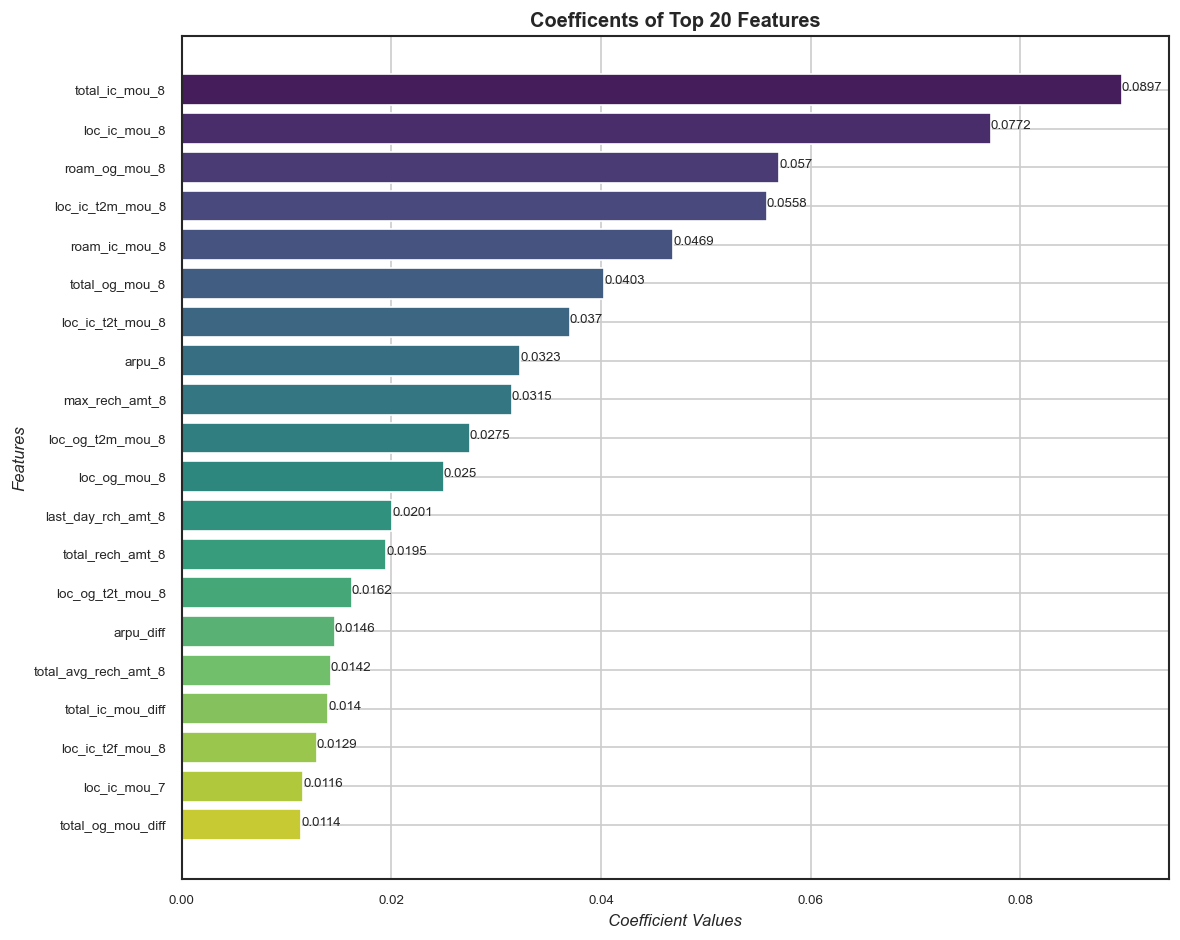

In [135]:
feature_df_top20= feature_df.loc[:19] 

sns.set(style='white')
plt.figure(figsize=(10,8), dpi=120)
ax= sns.barplot(y=feature_df_top20['Features'], x=feature_df_top20['Coefficient'], palette='viridis')

plt.xlabel('Coefficient Values', fontsize= 10, fontstyle='italic')
plt.ylabel('Features' , fontsize= 10, fontstyle='italic')
plt.title('Coefficents of Top 20 Features', fontsize=12,fontweight='bold')

coef= feature_df_top20['Coefficient'] 
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=8)

plt.grid(True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.autoscale()
plt.tight_layout()
plt.show()

## <font color="Blue"> XGBOOST Model without PCA

In [82]:
xgb_model = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
#xgb_model.get_params()

#### Grid Search Model for XGB

In [83]:
# A parameter grid for XGBoost
params = {
       'n_estimators' : [100, 200, 500], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
       'min_child_weight': [1, 5, 10],
       'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
       'colsample_bytree': [0.6, 0.8, 1.0],
       'max_depth': [3,5,10,12,15]
       }

folds = 2

param_comb = 10

random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb,
                                   scoring='recall', n_jobs=-1, cv=folds, verbose=3, random_state=42)
random_search.fit(X_train_resample, y_train_resample)
xgb_best = random_search.best_estimator_

Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [84]:
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [85]:
xgb_without_pca_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=1.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=1,monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [86]:
xgb_without_pca_model.fit(X_train_resample,y_train_resample)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Checking the metrics for train set

In [87]:
y_train_xgb_without_pca_pred = xgb_without_pca_model.predict(X_train_resample)

In [88]:
get_error_stats(y_train_resample,y_train_xgb_without_pca_pred ,"train")

====== TRAIN ======
====== Confusion Metrics ======
[[54526  2054]
 [ 1336 55244]]
True Positives:  55244
True Negatives:  54526
False Positives:  2054
False Negatives:  1336
Accuracy: 0.9700424178154825
Sensitivity: 0.9763874160480736
Specificity: 0.9636974195828915
ROC 0.9700424178154825


#### Checking the metrics for test (validation) set

In [89]:
y_test_xgb_without_pca_pred = xgb_without_pca_model.predict(X_test)

In [90]:
get_error_stats(y_test,y_test_xgb_without_pca_pred,"test")

====== TEST ======
====== Confusion Metrics ======
[[5962  325]
 [ 177  536]]
True Positives:  536
True Negatives:  5962
False Positives:  325
False Negatives:  177
Accuracy: 0.9282857142857143
Sensitivity: 0.7517531556802244
Specificity: 0.9483060283123906
ROC 0.8500295919963075


#### Checking the metrics for test (submission) set

In [91]:
y_submit_test_xgb_without_pca_pred = xgb_without_pca_model.predict(df_submit_test_without_pca)
y_submit_test_xgb_without_pca_pred.shape

(30000,)

In [92]:
get_error_stats(y_solution_test,y_submit_test_xgb_without_pca_pred,"submit")

====== SUBMIT ======
====== Confusion Metrics ======
[[25233  1708]
 [ 1135  1924]]
True Positives:  1924
True Negatives:  25233
False Positives:  1708
False Negatives:  1135
Accuracy: 0.9052333333333333
Sensitivity: 0.6289637136319058
Specificity: 0.9366022048179354
ROC 0.7827829592249206


## <font color="Green"> Modelling with PCA

### Let us run PCA on train data

In [93]:
pca = PCA(random_state=44)
pca.fit(X_train_resample)

PCA(random_state=44)

In [94]:
#pca.components_
#pca.explained_variance_ratio_

#### Visualising the Cummulative explained_variance_ratio_ sum graph

Text(0, 0.5, 'cumulative variance')

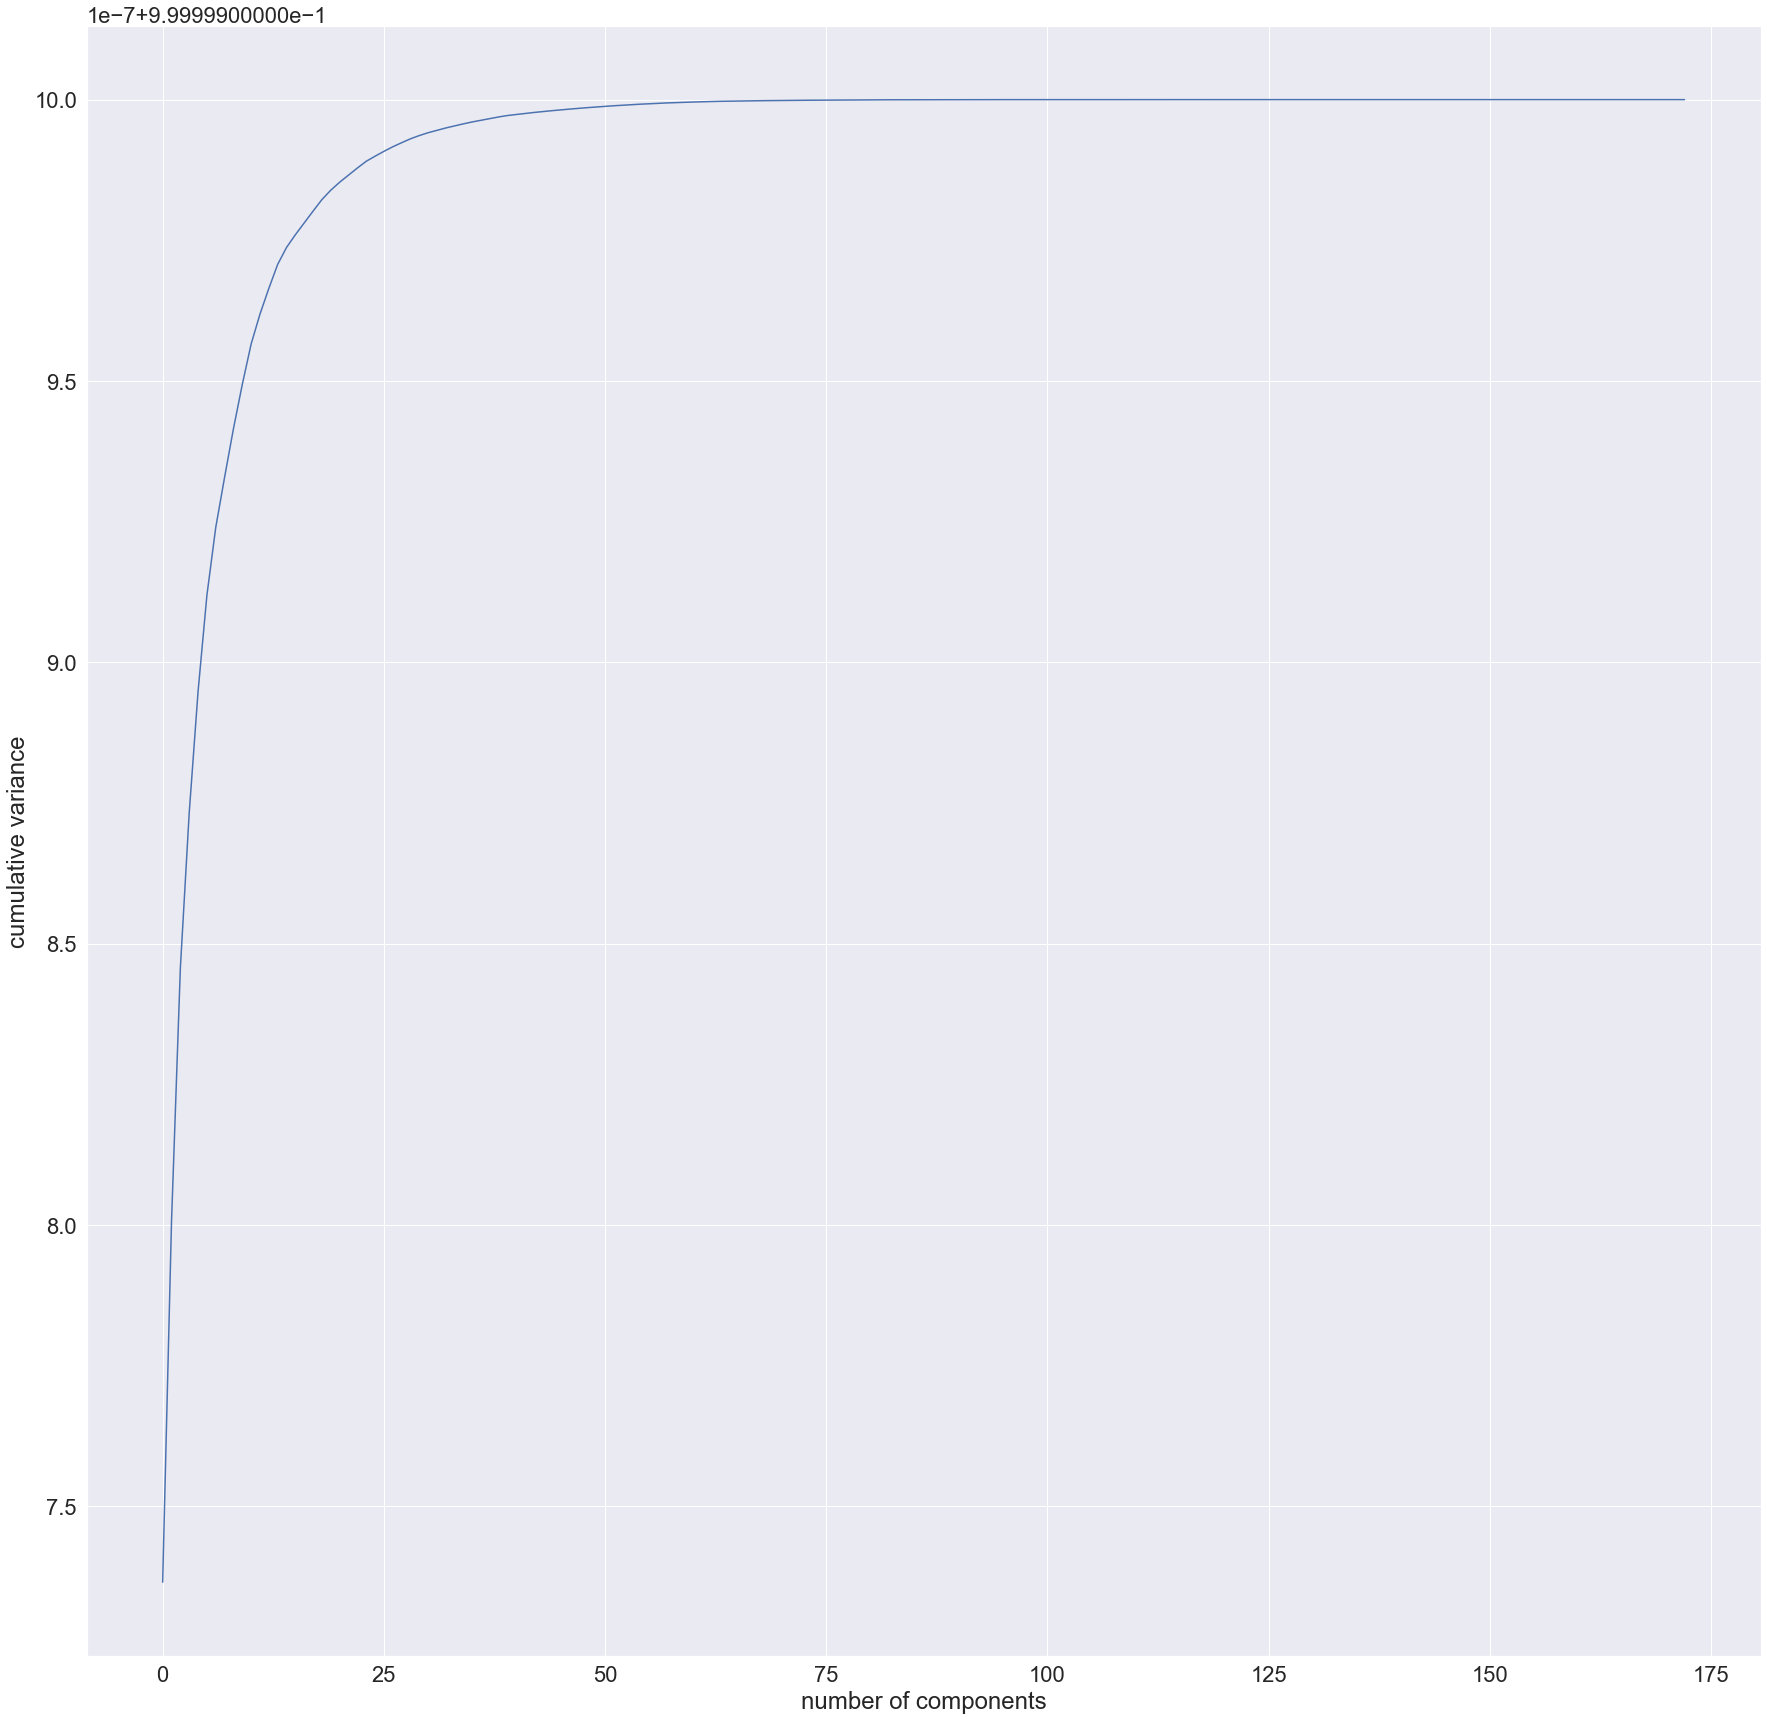

In [95]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize = (30,30))
plt.plot(var_cumu)
plt.xlabel('number of components')
plt.ylabel('cumulative variance')

#### Considering above graph, 50 PCA feature components would be the best choice, so we run PCA again with 50 parameters.

#### Transforming the train data set with PCA.

In [96]:
pca_final = IncrementalPCA(n_components=50)
X_train_resample_pca = pca_final.fit_transform(X_train_resample)
corrmat = np.corrcoef(X_train_resample_pca.transpose())

In [97]:
#plt.figure(figsize=[15,15])
#sns.heatmap(corrmat, annot=True)
#pca_direct_threshold = PCA(0.99)
#df_train_pca_direct_threshold = pca_direct_threshold.fit_transform(X_train)

#### Transforming the test (submission) data using PCA

In [98]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(7000, 50)

#### Running the PCA on final test data

In [99]:
df_submit_test_pca = pca_final.transform(df_test_submit)
df_submit_test_pca.shape

(30000, 50)

#### X_train_resample_pca,X_test_pca,df_submit_test_pca are the PCA applied data

## <font color="Green"> Logistic Regression Model with PCA

#### Running the Logistic Regression using Grid Search CV to find best parameters.

In [100]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)
params = {'C': [1,3,5,10,15,20,50,100,150,200]}


# Applying Ridge
logistic_regression = LogisticRegression()
# cross validation
folds = 2
logistic_model_cv = GridSearchCV(estimator = logistic_regression, 
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)           
logistic_model_cv.fit(X_train_resample_pca, y_train_resample)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=LogisticRegression(), param_grid={'C': [10]},
             return_train_score=True, scoring='recall', verbose=1)

#### Checking the grid search cv results

In [101]:
logistic_cv_results = pd.DataFrame(logistic_model_cv.cv_results_)
logistic_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.60,0.02,0.02,0.00,10,{'C': 10},0.87,0.88,0.87,0.01,1,0.87,0.88,0.87,0.00


#### Investigating best C value for logistic regression

In [103]:
best_C = logistic_model_cv.best_estimator_.C
logistic_model_cv.best_score_

0.8727995758218452

In [104]:
best_C

10

#### Checking the metrics for train set

In [105]:
logistic_regression_model_pca = LogisticRegression(C=best_C)
logistic_regression_model_pca.fit(X_train_resample_pca, y_train_resample)

LogisticRegression(C=10)

<Figure size 2160x2160 with 0 Axes>

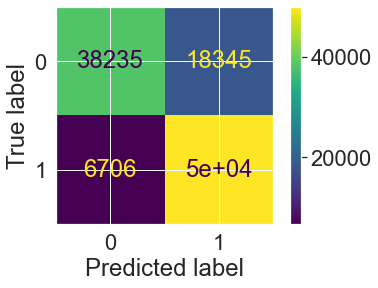

In [106]:
fig = plt.figure(figsize = (30,30))
metrics.plot_confusion_matrix(logistic_regression_model_pca, X_train_resample_pca, y_train_resample)
plt.show()

In [107]:
y_train_resample_pred = logistic_regression_model_pca.predict(X_train_resample_pca)
get_error_stats(y_train_resample,y_train_resample_pred,"train")

====== TRAIN ======
====== Confusion Metrics ======
[[38235 18345]
 [ 6706 49874]]
True Positives:  49874
True Negatives:  38235
False Positives:  18345
False Negatives:  6706
Accuracy: 0.7786231884057971
Sensitivity: 0.8814775539059738
Specificity: 0.6757688229056203
ROC 0.7786231884057971


#### Checking the metrics for test (validation) set

In [108]:
y_test_pca_pred = logistic_regression_model_pca.predict(X_test_pca)
get_error_stats(y_test,y_test_pca_pred,"test")

====== TEST ======
====== Confusion Metrics ======
[[4288 1999]
 [  96  617]]
True Positives:  617
True Negatives:  4288
False Positives:  1999
False Negatives:  96
Accuracy: 0.7007142857142857
Sensitivity: 0.8653576437587658
Specificity: 0.6820423095275966
ROC 0.7736999766431814


#### Checking the metrics for test (submission) set

In [109]:
y_submit_test_pred = logistic_regression_model_pca.predict(df_submit_test_pca)
y_submit_test_pred.shape

(30000,)

In [110]:
get_error_stats(y_solution_test,y_submit_test_pred,"submit")

====== SUBMIT ======
====== Confusion Metrics ======
[[18108  8833]
 [  440  2619]]
True Positives:  2619
True Negatives:  18108
False Positives:  8833
False Negatives:  440
Accuracy: 0.6909
Sensitivity: 0.856162144491664
Specificity: 0.6721354070004826
ROC 0.7641487757460733


<Figure size 2160x2160 with 0 Axes>

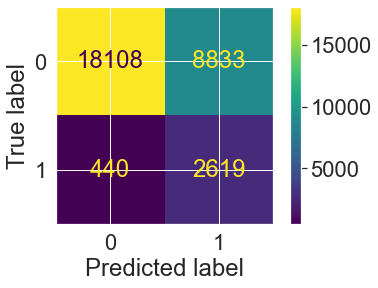

In [111]:
fig = plt.figure(figsize = (30,30))
metrics.plot_confusion_matrix(logistic_regression_model_pca, df_submit_test_pca, y_solution_test)
plt.show()

## <font color="Green"> Random Forest Model with PCA

In [112]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

#### Running Random Forest using grid search cv for finding best parameters

In [113]:
 Create the parameter grid based on the results of random search 
params = {
     'max_depth': [20,30,50,100],
     'min_samples_leaf': [2,5],
     'max_features': [4,8,12,20],
     'n_estimators': [200,300,500,1000]
 }

grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=2, n_jobs=-1, verbose=1, scoring = "recall")
grid_search.fit(X_train_resample_pca, y_train_resample)
rf_best = grid_search.best_estimator_

Fitting 2 folds for each of 1 candidates, totalling 2 fits


#### get random forest best fit model

In [114]:
rf_best

RandomForestClassifier(max_depth=20, max_features=12, min_samples_leaf=2,
                       n_estimators=300, n_jobs=-1, random_state=42)

#### Checking the metrics for train set

In [115]:
rf_best.fit(X_train_resample_pca, y_train_resample)

RandomForestClassifier(max_depth=20, max_features=12, min_samples_leaf=2,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [116]:
y_train_resample_pred_rf = rf_best.predict(X_train_resample_pca)
get_error_stats(y_train_resample,y_train_resample_pred_rf,"train")

====== TRAIN ======
====== Confusion Metrics ======
[[55402  1178]
 [   47 56533]]
True Positives:  56533
True Negatives:  55402
False Positives:  1178
False Negatives:  47
Accuracy: 0.9891746200070697
Sensitivity: 0.9991693177801343
Specificity: 0.979179922234005
ROC 0.9891746200070697


#### Checking the metrics for test (validation) set

In [117]:
y_test_pca_pred_rf = rf_best.predict(X_test_pca)
get_error_stats(y_test,y_test_pca_pred_rf,"test")

====== TEST ======
====== Confusion Metrics ======
[[5836  451]
 [ 235  478]]
True Positives:  478
True Negatives:  5836
False Positives:  451
False Negatives:  235
Accuracy: 0.902
Sensitivity: 0.6704067321178121
Specificity: 0.9282646731350406
ROC 0.7993357026264263


#### Checking the metrics for test (submission) set


In [118]:
y_submit_test_pred = rf_best.predict(df_submit_test_pca)
get_error_stats(y_solution_test,y_submit_test_pred,"submit")

====== SUBMIT ======
====== Confusion Metrics ======
[[25336  1605]
 [ 1340  1719]]
True Positives:  1719
True Negatives:  25336
False Positives:  1605
False Negatives:  1340
Accuracy: 0.9018333333333334
Sensitivity: 0.5619483491337038
Specificity: 0.9404253739653317
ROC 0.7511868615495177


show confusion matrix results on final test data

<Figure size 2160x2160 with 0 Axes>

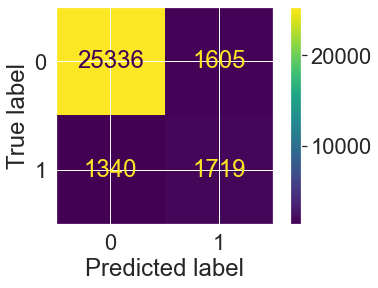

In [119]:
fig = plt.figure(figsize = (30,30))
metrics.plot_confusion_matrix(rf_best, df_submit_test_pca, y_solution_test)
plt.show()

## <font color="Green"> XGBoost with PCA

In [120]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### Running XGBoost using randomized search CV for getting best parameter values

In [121]:
 A parameter grid for XGBoost
params = {
         'n_estimators' : [750,1000,1500,2000], # no of trees 
         'learning_rate' : [0.1, 0.25],  # eta
         'min_child_weight': [1, 5],
         'gamma': [1.5,2, 5],
         'colsample_bytree': [0.6, 0.8],
         'max_depth': [5, 10, 15]
         }
folds = 2

param_comb = 10

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=-1, cv=folds, verbose=3, random_state=42)
random_search.fit(X_train_resample_pca, y_train_resample)
xgb_best = random_search.best_estimator_

Fitting 2 folds for each of 1 candidates, totalling 2 fits


#### Investigate xgboost best parameters

In [122]:
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Checking the metrics for train set

In [123]:
xgb_best.fit(X_train_resample_pca, y_train_resample)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [124]:
y_train_resample_pred = xgb_best.predict(X_train_resample_pca)
get_error_stats(y_train_resample,y_train_resample_pred,"train")

====== TRAIN ======
====== Confusion Metrics ======
[[56570    10]
 [    1 56579]]
True Positives:  56579
True Negatives:  56570
False Positives:  10
False Negatives:  1
Accuracy: 0.999902792506186
Sensitivity: 0.9999823259102156
Specificity: 0.9998232591021562
ROC 0.999902792506186


#### Checking the metrics for test (validation) set

In [125]:
y_test_pca_pred = xgb_best.predict(X_test_pca)
get_error_stats(y_test,y_test_pca_pred,"test")

====== TEST ======
====== Confusion Metrics ======
[[5873  414]
 [ 239  474]]
True Positives:  474
True Negatives:  5873
False Positives:  414
False Negatives:  239
Accuracy: 0.9067142857142857
Sensitivity: 0.664796633941094
Specificity: 0.9341498329887069
ROC 0.7994732334649004


#### Checking the metrics for test (submission) set

In [126]:
y_submit_test_pred = xgb_best.predict(df_submit_test_pca)
df_solution_test['churn_probability'].value_counts()

0    26941
1     3059
Name: churn_probability, dtype: int64

In [127]:
get_error_stats(y_solution_test,y_submit_test_pred,"submit")

====== SUBMIT ======
====== Confusion Metrics ======
[[25580  1361]
 [ 1409  1650]]
True Positives:  1650
True Negatives:  25580
False Positives:  1361
False Negatives:  1409
Accuracy: 0.9076666666666666
Sensitivity: 0.5393919581562602
Specificity: 0.9494822018484838
ROC 0.7444370800023721


<Figure size 2160x2160 with 0 Axes>

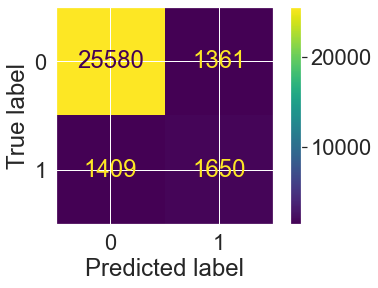

In [128]:
fig = plt.figure(figsize = (30,30))
metrics.plot_confusion_matrix(xgb_best, df_submit_test_pca, y_solution_test)
plt.show()

#### All Model prediction results with and without PCA for submission test data

|	Model	|	Accuracy	|	Sensitivity	|	Specificity	|
|	------	|	------	|	------	|	------	|
|	Logistic Regression without PCA	|	0.7569	|	0.8594	|	0.7452	|
|	Random Forest without PCA	|	0.9104	|	0.6449	|	0.9405	|
|	XGBoost without PCA	|	0.9054	|	0.6305	|	0.9366	|
|	Logistic Regression with PCA	|	0.6986	|	0.8587	|	0.6804	|
|	Random Forest with PCA	|	0.9018	|	0.5619	|	0.9404	|
|	XGBoost with PCA                	|	0.9076	|	0.5394	|	0.9494	|


#### The feature importances as predicted by the Random Forest without PCA model as follows 

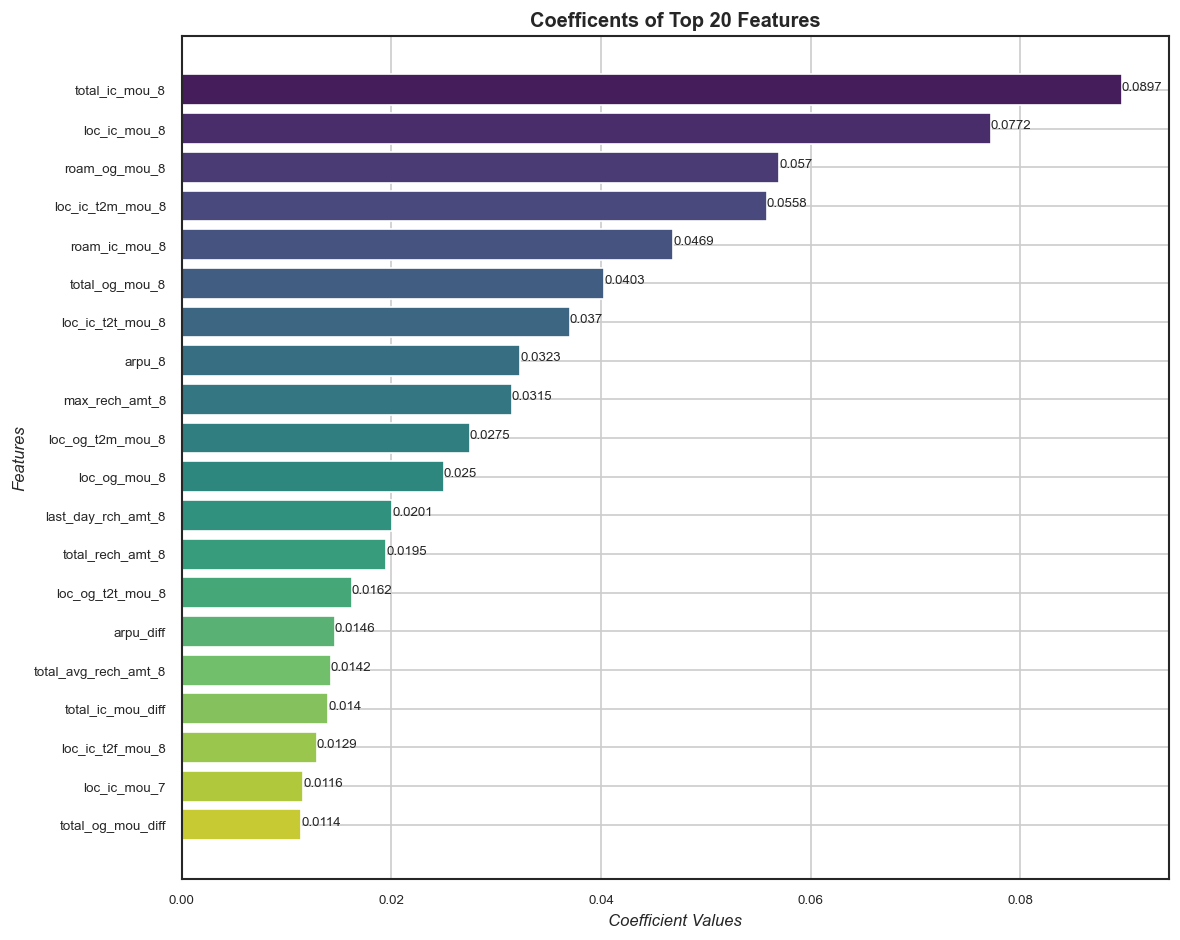

## <font color="Green"> Conclusions & Recommendations:

- The company should monitor the total incoming minutes of usage in the action phase (month of august). The customers who showed a lesser minutes of usage should be in company's target.

- The *minutes of usage for local and roaming calls in incoming and outgoing* is also important business metric which needs to be monitored. If a customer starts showing lesser usage of the telecom service from the company, it may be due to his inclination to some other telecom service provider. These customers need to be identified and provided with specially designed schemes.

- The *average revenue per customer* is also another important parameter which needs to be monitored. If there is a notable decrease in the arpu, the customer might be dissatisfied with the service and hence he is not willing to subscribe to the recharge plans. These customers need to be provided with incentives and better services.

- The data usage is another important parameter for the telecom company to monitor. The customers showing lesser data usage in the action phase are more prone to churn. The company may roll out attractive offers that combine both talktime and data facilities like re-using leftover data.

- Also the roaming incoming and outgoing calls in action phase tend to be an important metric of measurement. The telecom company may think in the direction of revising the STD & ISD rates in-order to retain the high value customers.

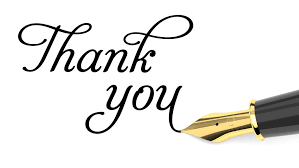